In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Procesamiento de datos

In [3]:
data = pd.read_csv("C:/Users/Carlos Vesga/OneDrive - Universidad del Norte/Escritorio/Machine Learning maestria/data_treino_dv_df_2000_2010.csv")

# Analisis exploratorio

## Cantidad y tipo de variables.

In [4]:
data.shape

(87693, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   HORA (UTC)                                             87693 non-null  object 
 1   VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))             87693 non-null  float64
 2   VENTO, VELOCIDADE HORARIA (m/s)                        87693 non-null  float64
 3   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 4   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 5   TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 6   TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 7   UMIDADE RELATIVA DO AR, HORARIA (%)                    87693 non-null  float64
 8   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR

In [6]:
data.head()

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


## Valores faltantes

In [7]:
print("# NaN values:", data.isna().sum().sum())

# NaN values: 0


No tenemos ningun valor faltante, por lo cual no tenemos la necesidad de imputar.

## Cambiar nombre de las columnas y guardar numericas y categoricas

Lo primero que hacemos es cambiar el nombre de las columnas de portugues a español, para facilitar el manejo de la data.

In [8]:
data.columns=['HORA','Direccion','Velocidad','Humedad MX', 'Humedad MN', 'Temp MX', 'Temp MN', 'Humedad relativa', 'Presion atmosferica','Precipitacion','MX vel','Presion MX','Presion MN']

In [9]:
data.head()

,HORA,Direccion,Velocidad,Humedad MX,Humedad MN,Temp MX,Temp MN,Humedad relativa,Presion atmosferica,Precipitacion,MX vel,Presion MX,Presion MN
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


Apartamos las variables numericas y categoricas.

In [10]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['HORA'], dtype='object')
Numerical Variables:
['Direccion', 'Velocidad', 'Humedad MX', 'Humedad MN', 'Temp MX', 'Temp MN', 'Humedad relativa', 'Presion atmosferica', 'Precipitacion', 'MX vel', 'Presion MX', 'Presion MN']


In [16]:
print(data.describe())

          Direccion     Velocidad    Humedad MX    Humedad MN       Temp MX  \
count  87693.000000  87693.000000  87693.000000  87693.000000  87693.000000   
mean       0.405810      2.466192     69.058465     63.176194     21.921264   
std        0.686247      1.313968     19.640222     20.166336      3.721386   
min       -1.000000      0.000000     12.000000     10.000000      9.200000   
25%       -0.156434      1.500000     54.000000     48.000000     19.200000   
50%        0.788011      2.400000     72.000000     64.000000     21.400000   
75%        0.970296      3.400000     87.000000     80.000000     24.700000   
max        1.000000     10.000000    100.000000     98.000000     35.300000   

            Temp MN  Humedad relativa  Presion atmosferica  Precipitacion  \
count  87693.000000      87693.000000         87693.000000   87693.000000   
mean      20.684570         66.146682           887.251925       0.160907   
std        3.513744         19.992327             4.01240

Observamos que la magnitud de las variables es bastante diferente entre si, esto sugiere la necesidad de escalar los datos al momento de pronosticar.

In [17]:
for column in data.columns:
    print(f"{column}: {data[column].nunique()} unique values")

HORA: 24 unique values
Direccion: 290 unique values
Velocidad: 89 unique values
Humedad MX: 89 unique values
Humedad MN: 89 unique values
Temp MX: 251 unique values
Temp MN: 247 unique values
Humedad relativa: 90 unique values
Presion atmosferica: 446 unique values
Precipitacion: 154 unique values
MX vel: 176 unique values
Presion MX: 415 unique values
Presion MN: 425 unique values


Graficamos cuantos valores unicos tiene cada columnas, para identificar posibles variables categoricas.

### Guardar variable de respuesta

In [11]:
Y = data.Velocidad
Y.head()

0    1.8
1    2.7
2    2.0
3    2.5
4    2.4
Name: Velocidad, dtype: float64

## Analisis de sesgo y curtosis por variable numerica

Column:  Direccion
Skew: -0.86
Kurtosis:  -0.82


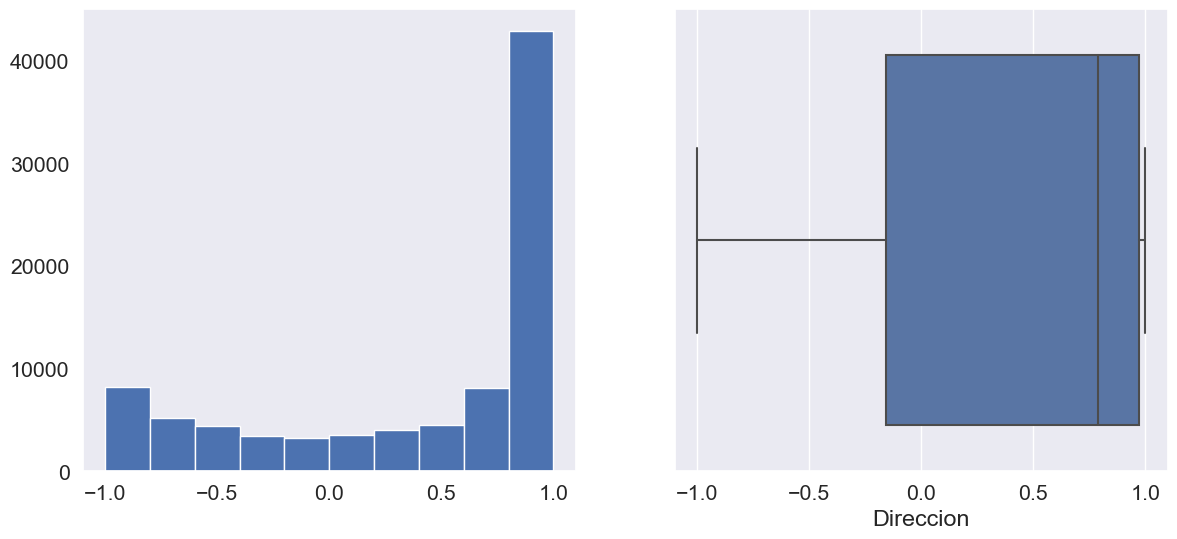

Column:  Velocidad
Skew: 0.37
Kurtosis:  -0.11


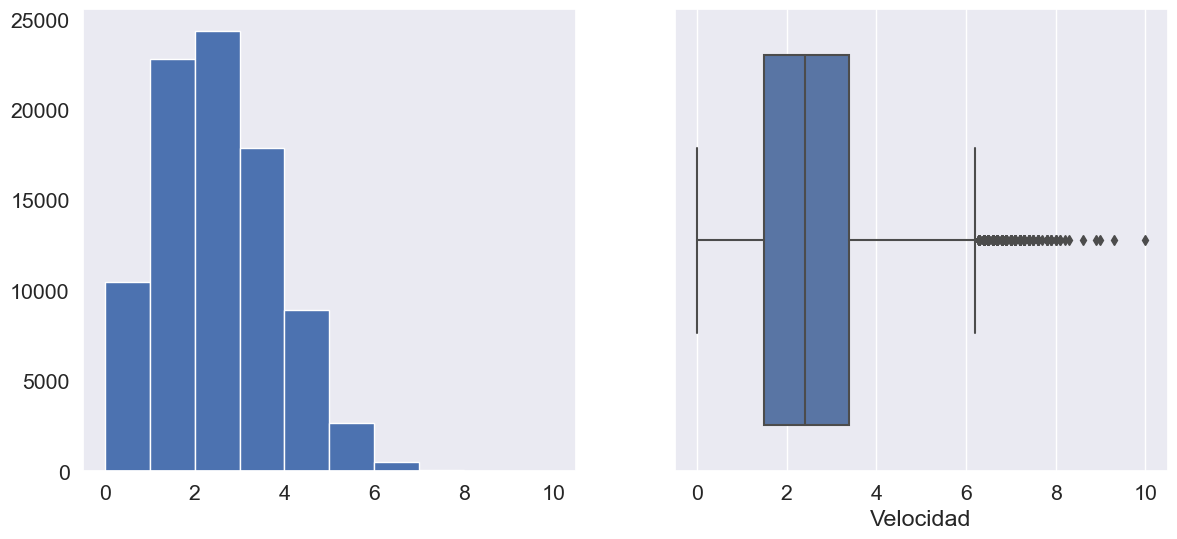

Column:  Humedad MX
Skew: -0.48
Kurtosis:  -0.78


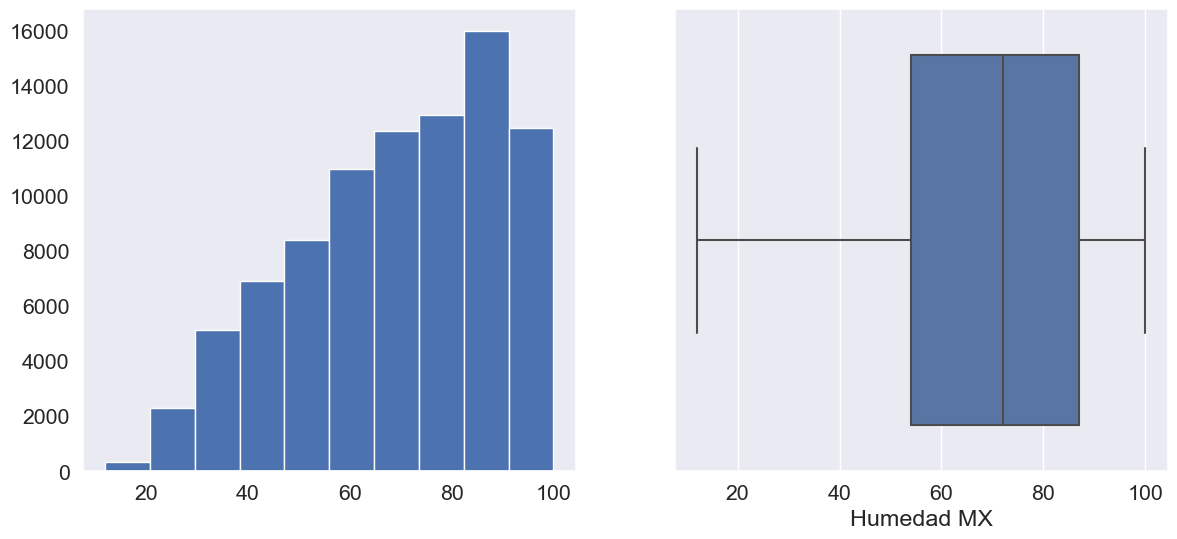

Column:  Humedad MN
Skew: -0.23
Kurtosis:  -0.96


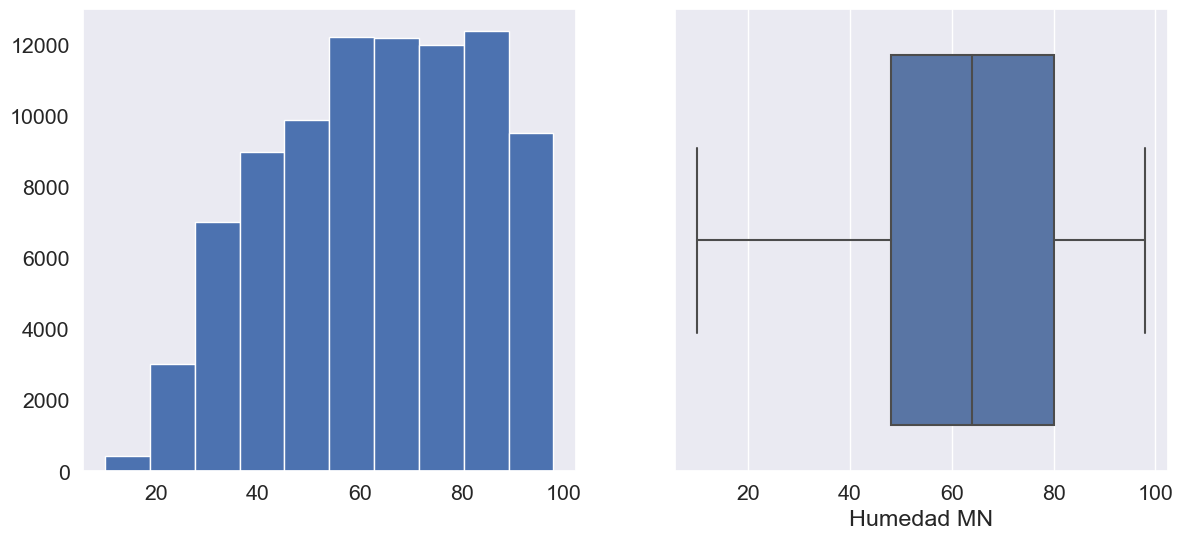

Column:  Temp MX
Skew: 0.26
Kurtosis:  -0.42


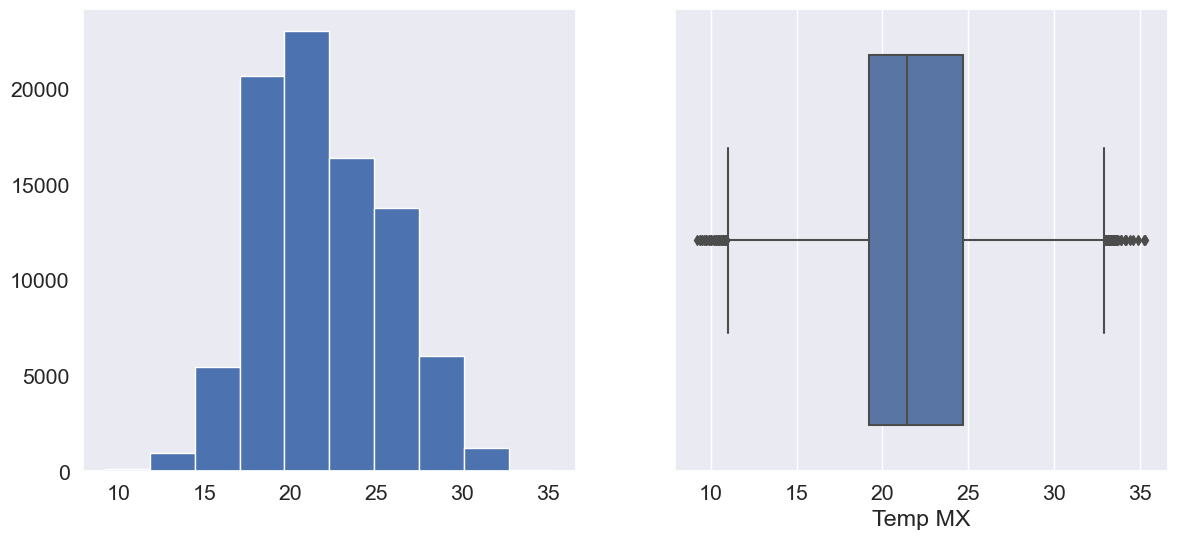

Column:  Temp MN
Skew: 0.24
Kurtosis:  -0.12


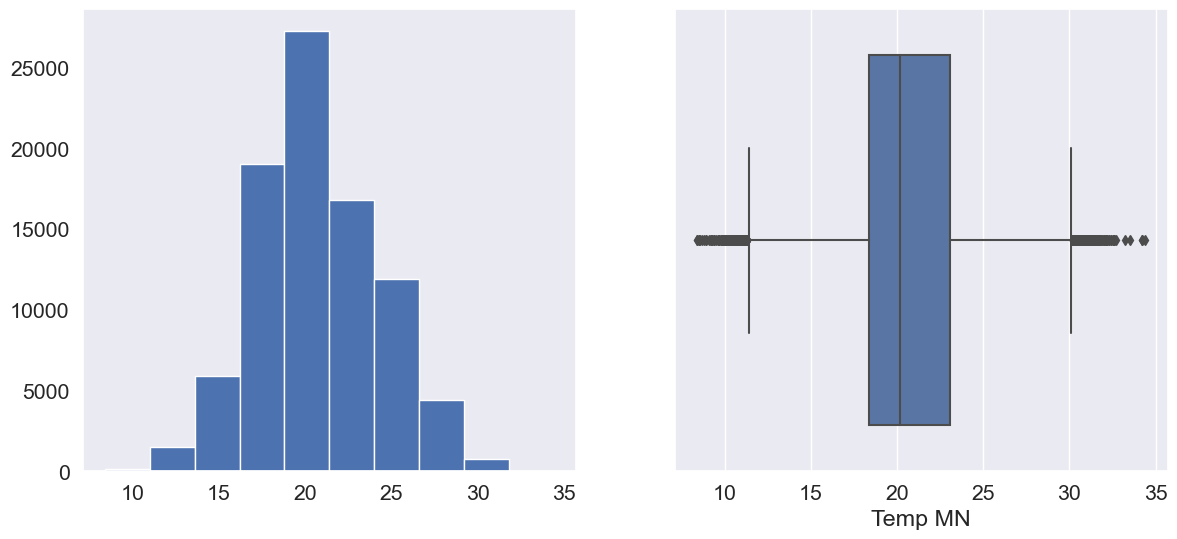

Column:  Humedad relativa
Skew: -0.35
Kurtosis:  -0.89


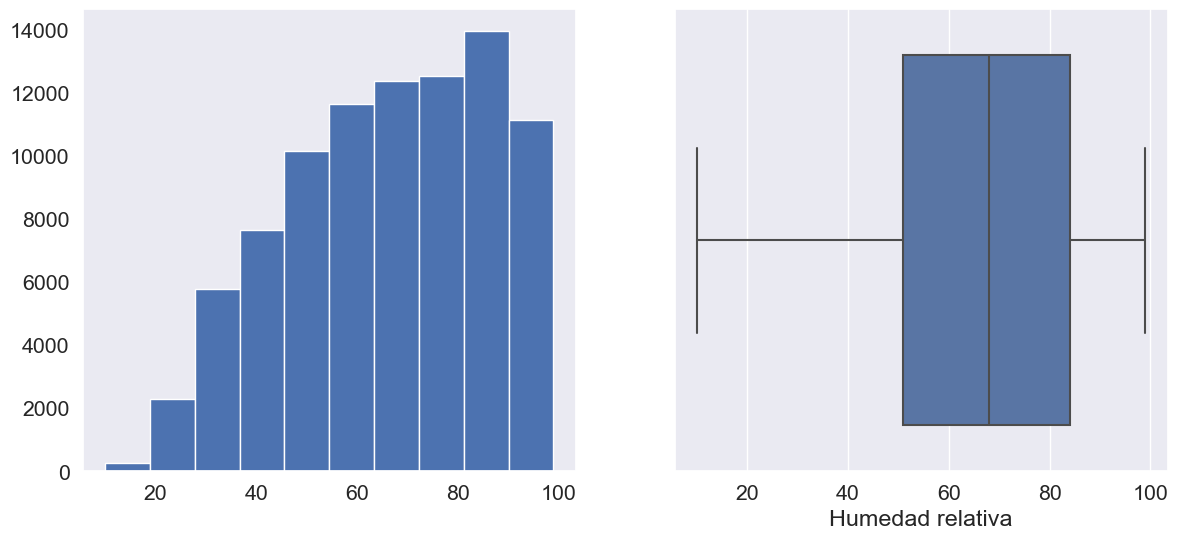

Column:  Presion atmosferica
Skew: 6.18
Kurtosis:  179.64


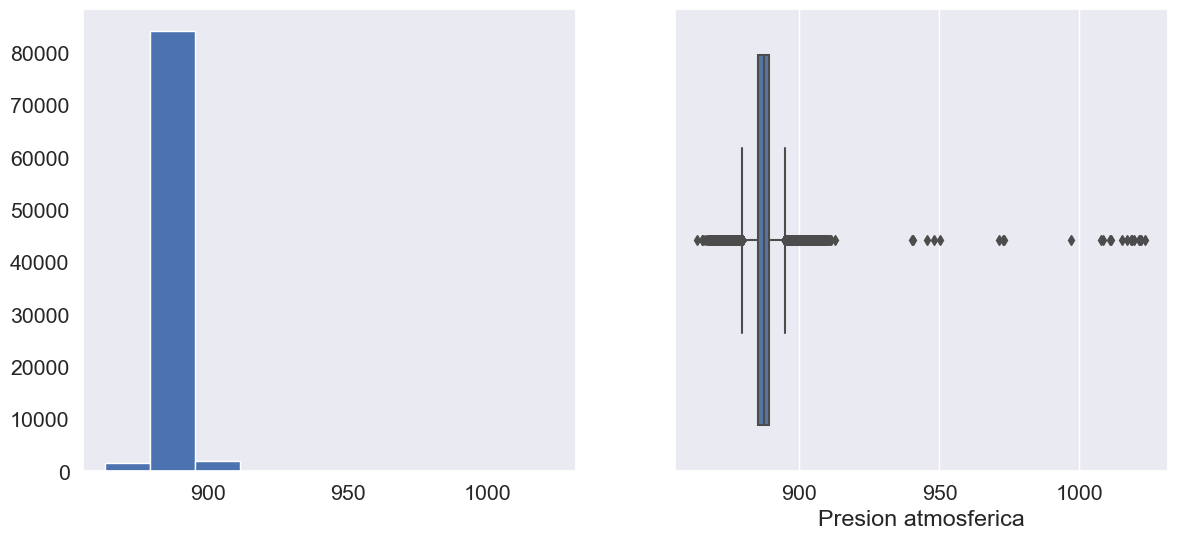

Column:  Precipitacion
Skew: 17.65
Kurtosis:  476.4


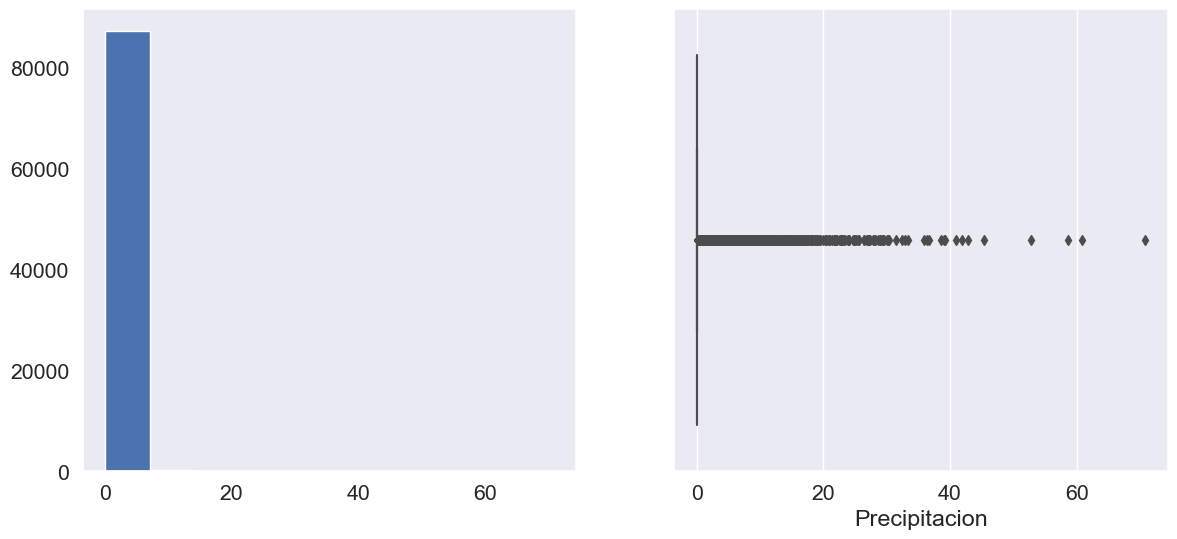

Column:  MX vel
Skew: 0.41
Kurtosis:  0.11


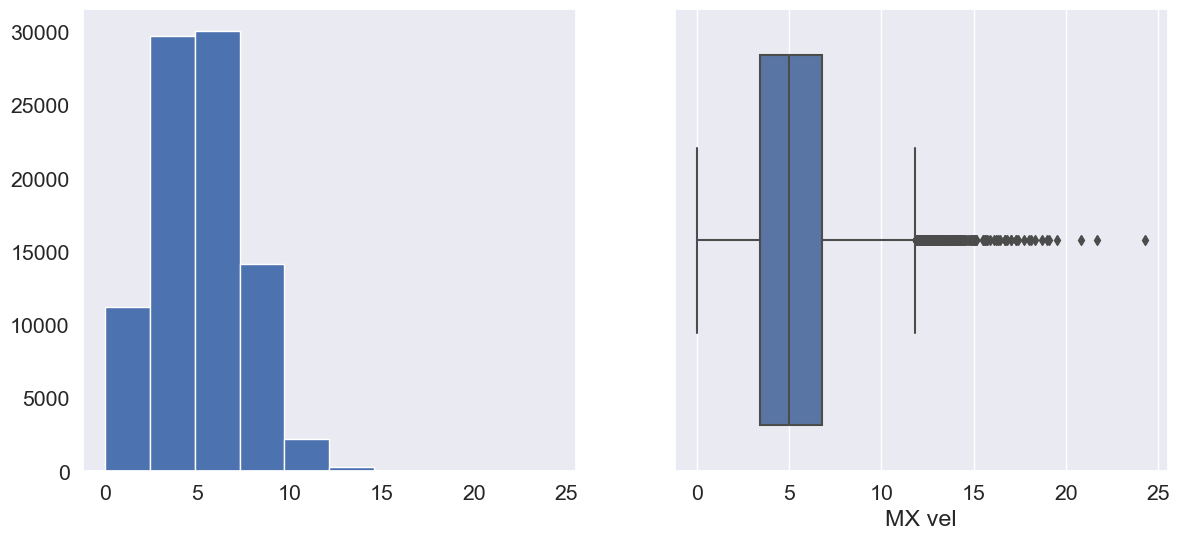

Column:  Presion MX
Skew: 1.02
Kurtosis:  5.82


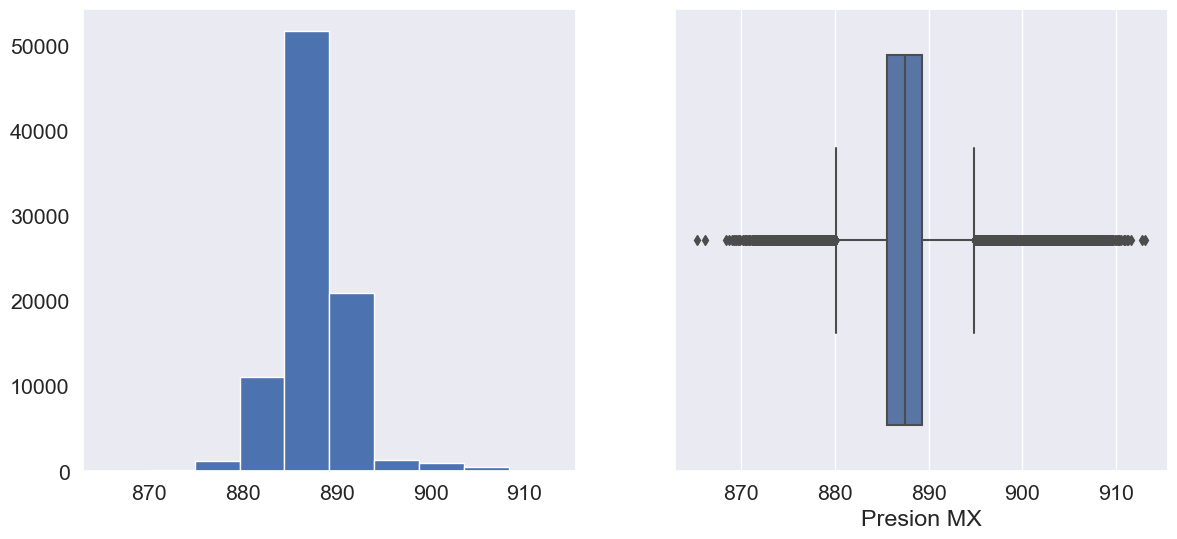

Column:  Presion MN
Skew: 0.33
Kurtosis:  4.91


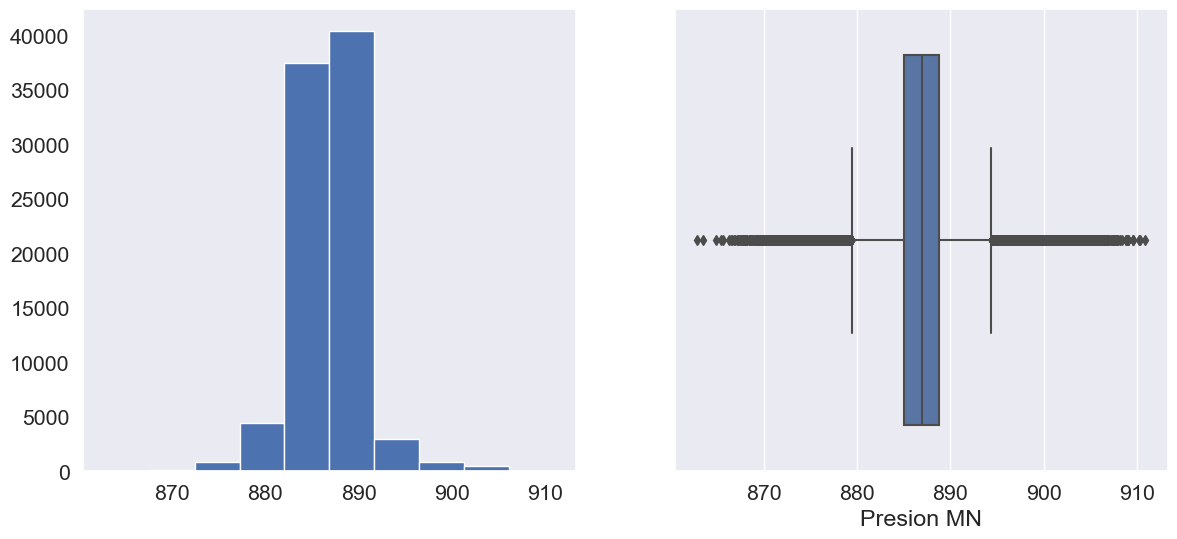

In [12]:
sns.set(font_scale=1.4)
for col in num_cols:
    print('Column: ', col)
    print('Skew:', round(data[col].skew(), 2))
    print('Kurtosis: ', round(data[col].kurtosis(), 2))
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

Podemos ver los histogramas para cada variable numerica, a simple vista parece que las variables de presion y precipitacion no varian mucho, lo que probablemente sea una pista para retirarlas del modelo. Al analizar la humedad se llega a la conclusion que los datos fueron recolectados en una zona humeda, es posible que no se pueda saber la verdadera relacion de esta variable con la velocidad del viento. 

## Analisis de comportamiento para varible de respuesta

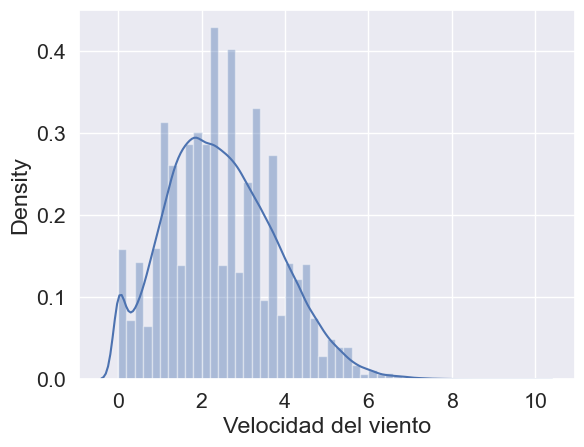

In [13]:
sns.distplot(data["Velocidad"], axlabel="Velocidad del viento");

La velocidad el viento sigue una distribucion aproximadamente gausiana ligeramente sesgada a la derecha.

In [14]:
def scatter_regplot(data, strx, stry):
    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    sns.scatterplot(data=data, x=strx, y=stry, ax=ax[0])
    sns.regplot(data=data, x=strx, y=stry, ax=ax[1]);
    fig.suptitle('Relación entre %s y velocidad'%col)

## Scatterplot entre cada variable numerica y la velocidad del viento

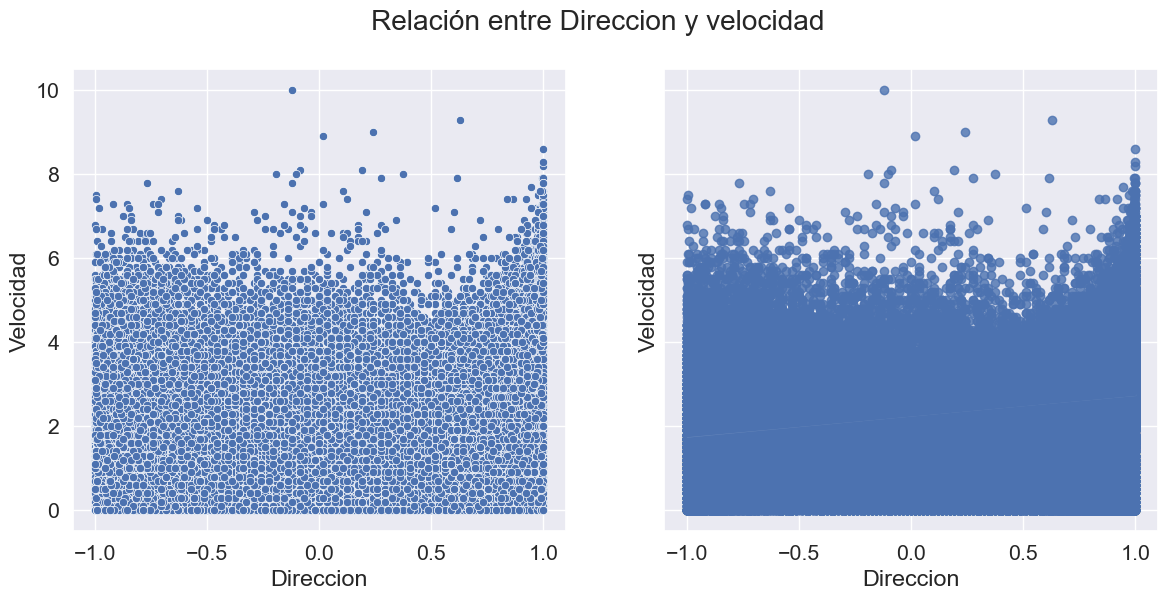

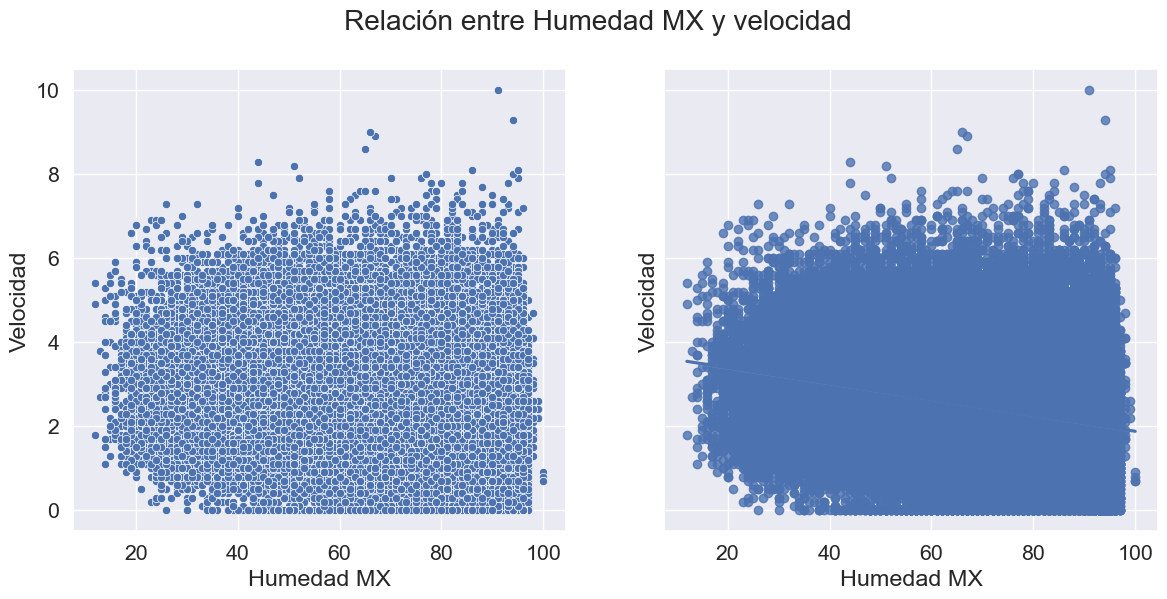

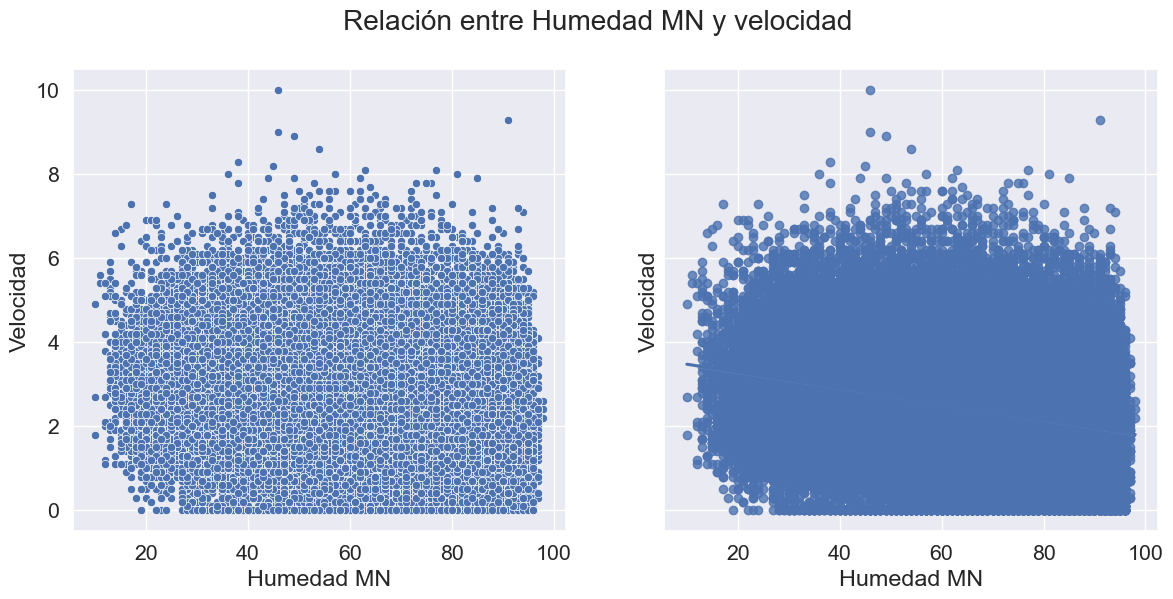

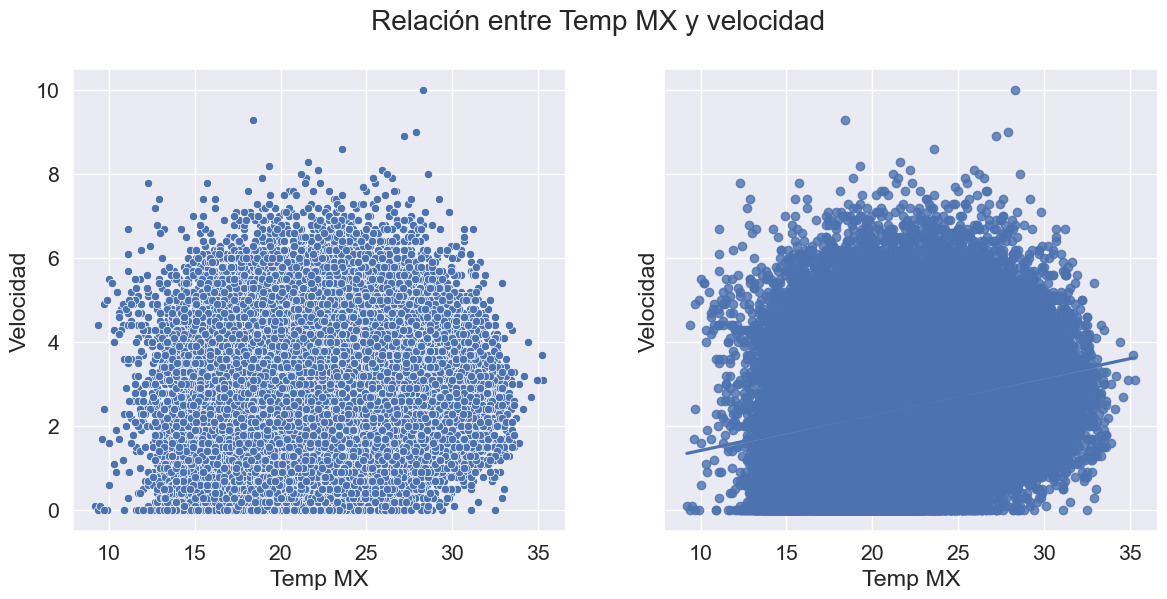

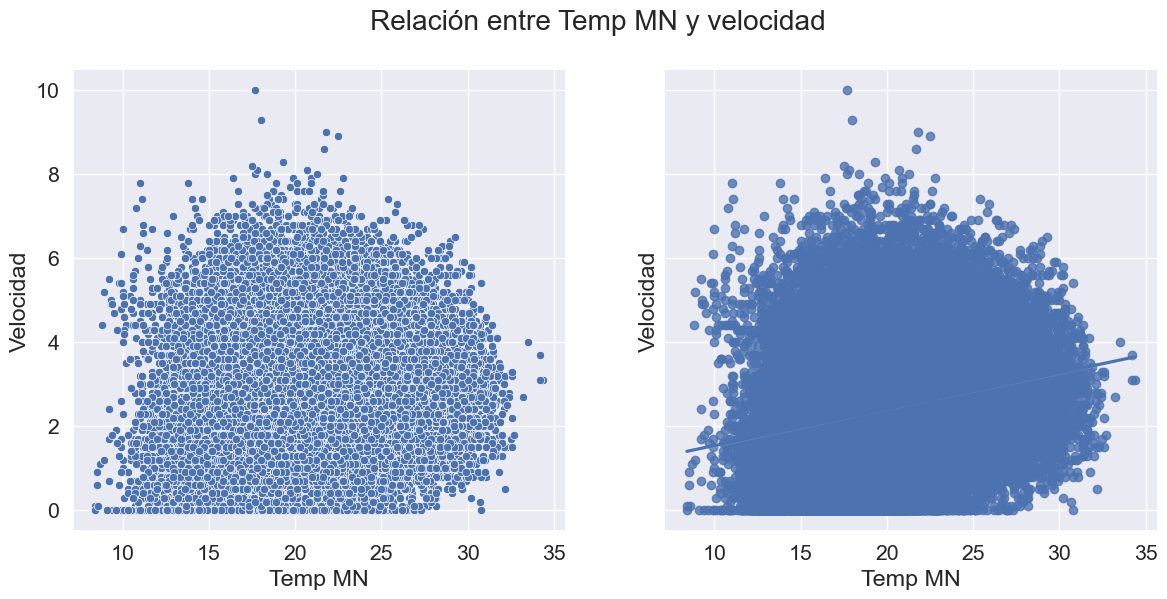

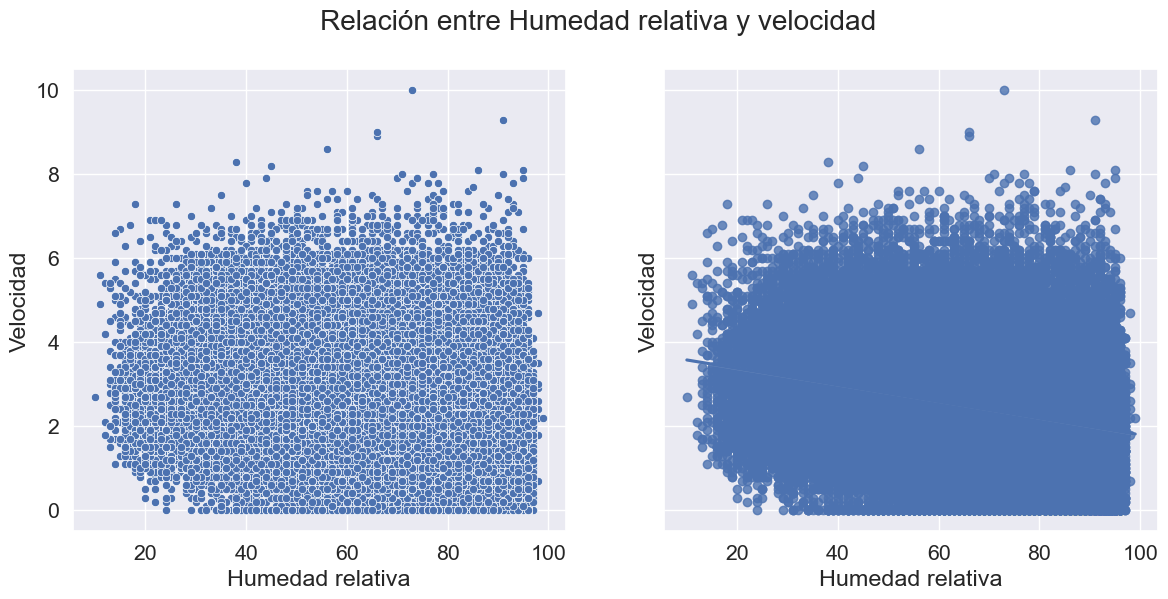

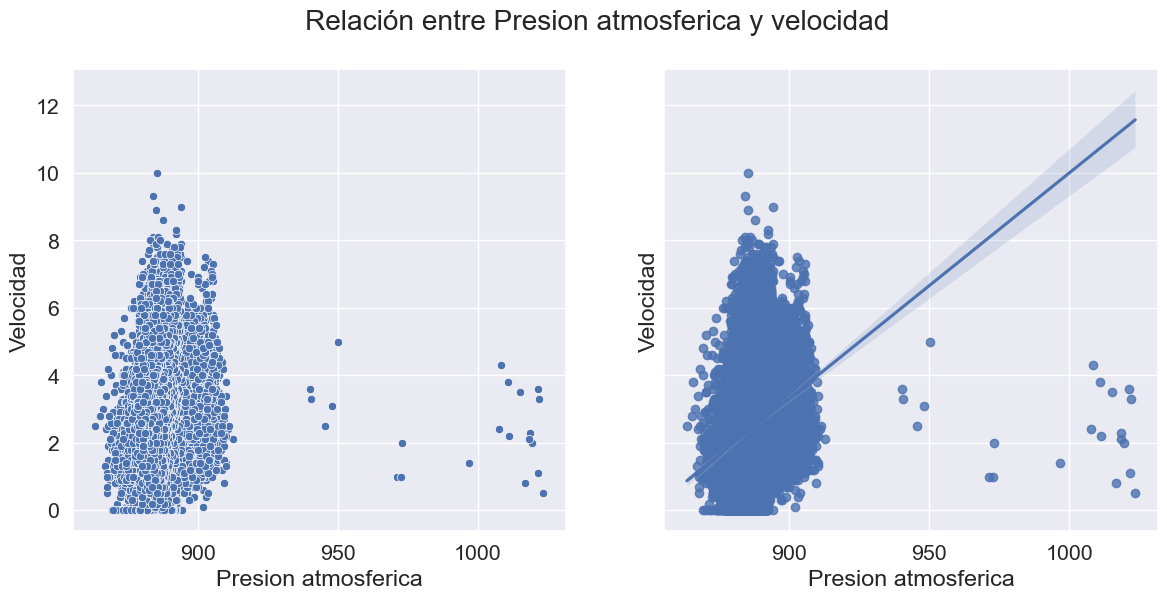

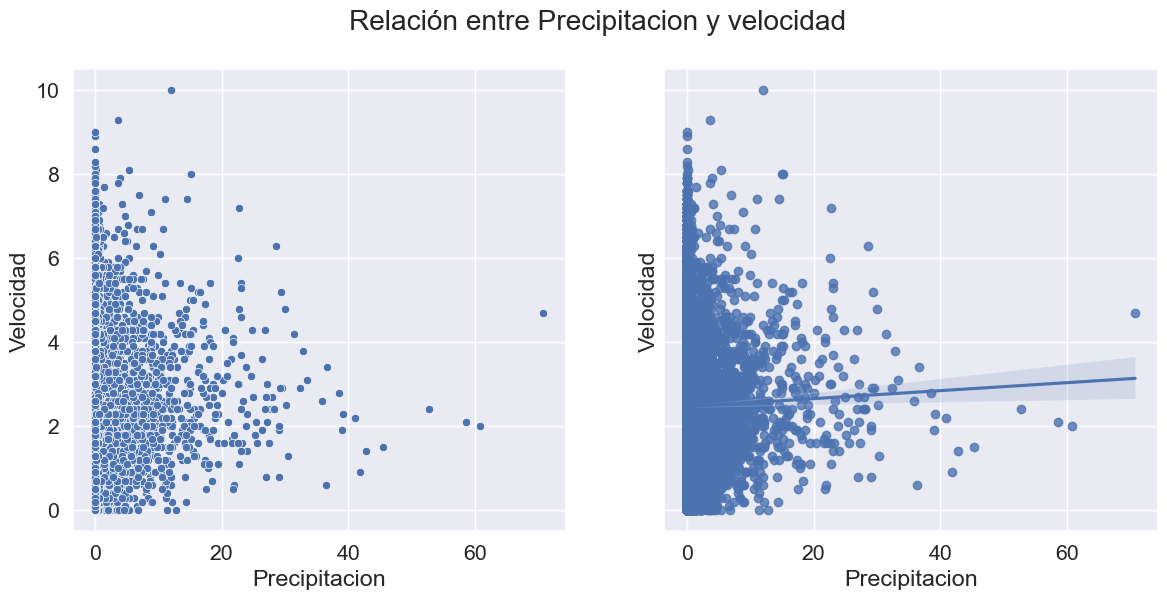

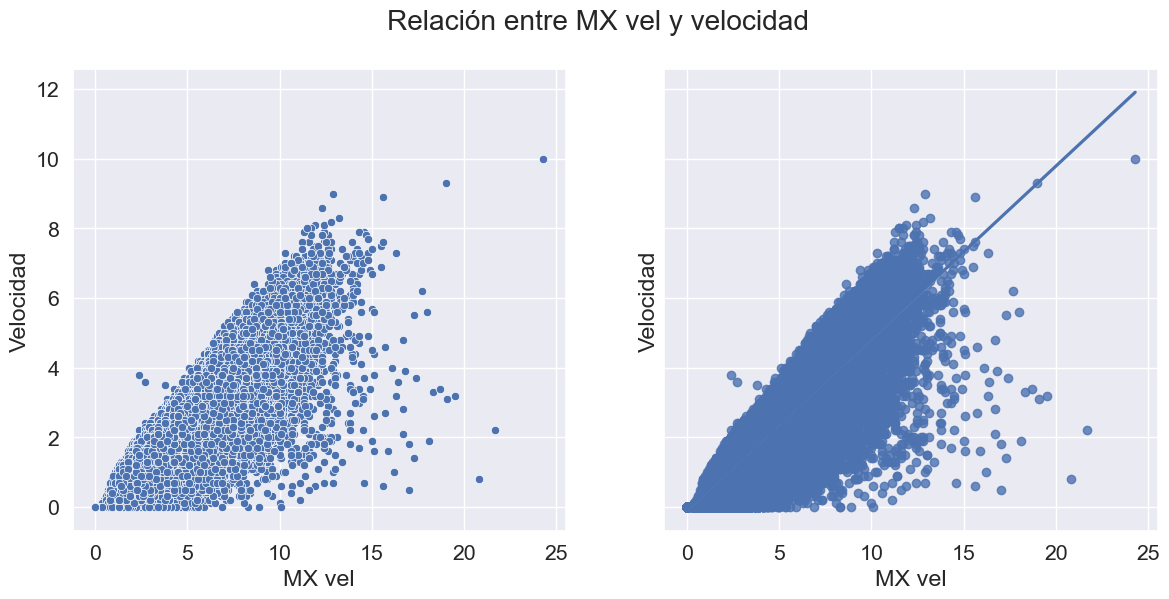

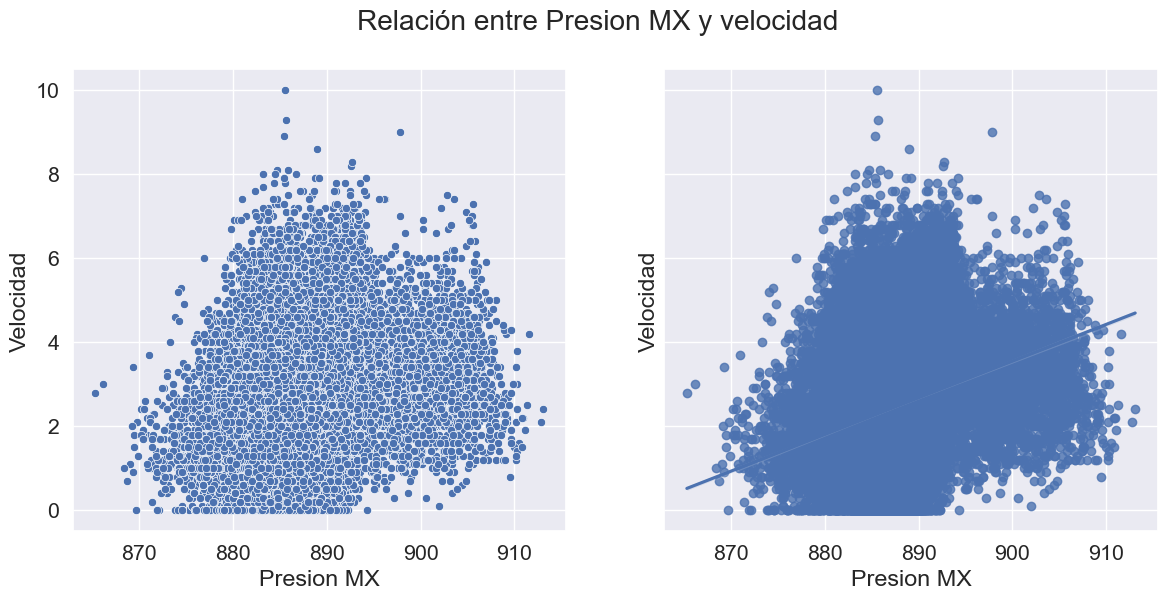

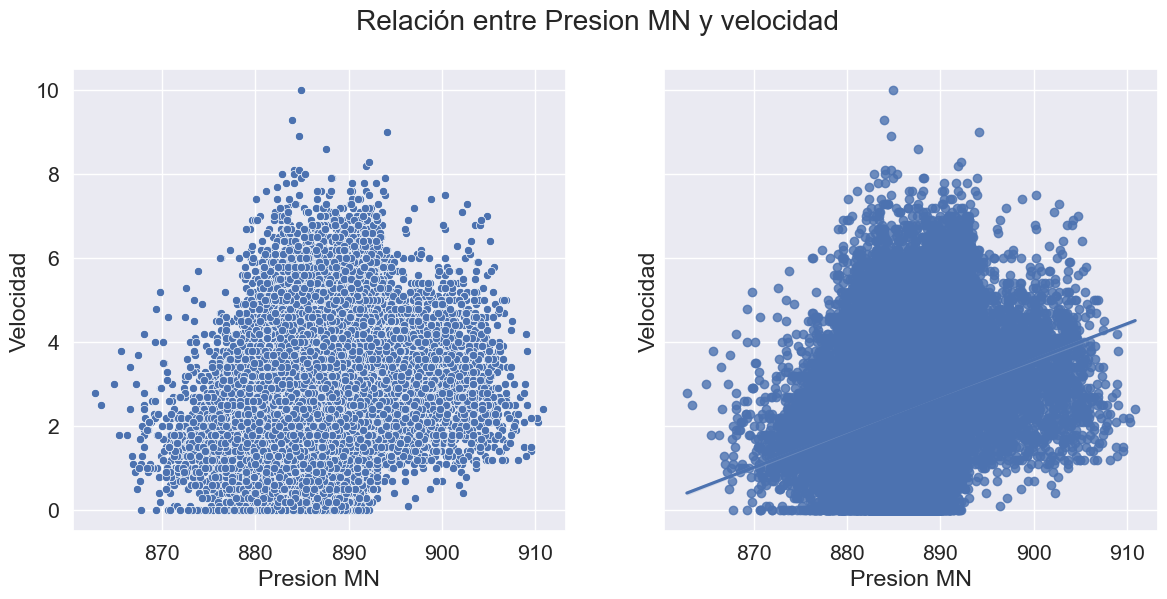

In [15]:
num_cols.remove('Velocidad')
for col in num_cols:
    scatter_regplot(data, col, 'Velocidad')

A simple vista no pareciera que exitiera correlacion entre la velocidad del viento y las otras variables, con excepcion de la velocidad maxima del viento.

## Analisis de comportamiento por hora del dia

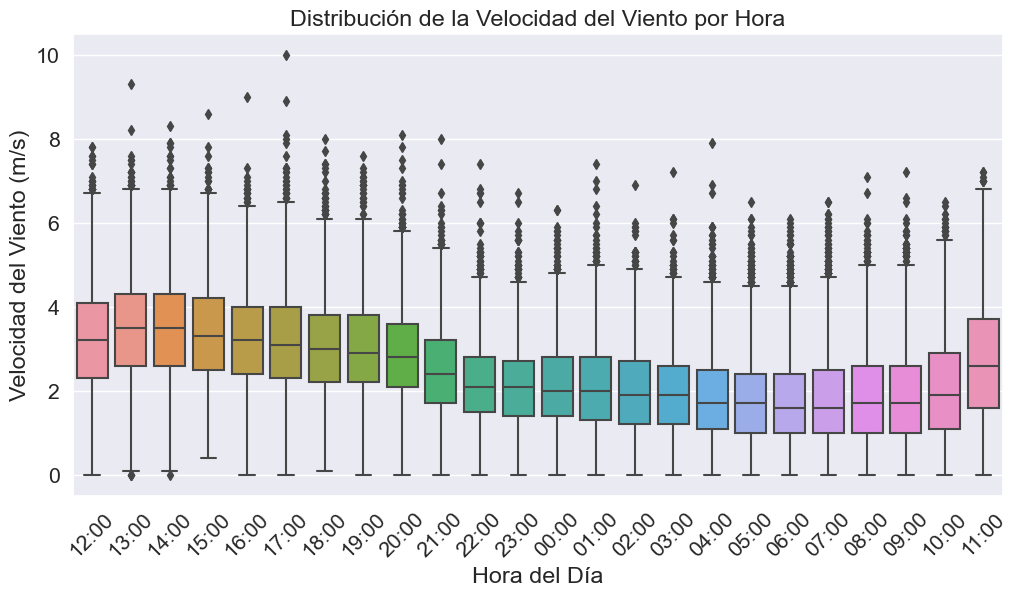

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='HORA', y='Velocidad', data=data)
plt.title('Distribución de la Velocidad del Viento por Hora')
plt.xlabel('Hora del Día')
plt.xticks(rotation=45)  # Añade esta línea si las etiquetas del eje x están sobrepuestas
plt.ylabel('Velocidad del Viento (m/s)')
plt.show()

A simple vista parece que existe una diferencia entre la velcoidad el viento y la hora del dia, como no podemos asegurar esto se decide hacer una prueba de diferencia de varianzas parametrica (ANOVA), recordemos que para utilizar esta prueba estadistica tenemos que ver si nuestros datos cumplen los supuestos de normalidad, homogeneidad e independencia

### Prueba de normalidad

Sabemos que para realizar una prueba de normalidad primero necesitamos calcular y graficas los residuos.

In [31]:
import statsmodels.api as sm
residuals = data['Velocidad'] - data['Velocidad'].mean()

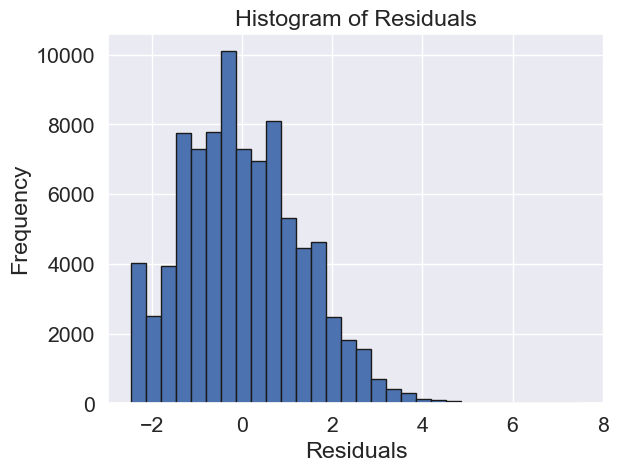

In [29]:
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [28]:
w, p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk P-value: {p_value}")

Shapiro-Wilk P-value: 0.0


El pvalue de la Shapiro-Wilk da menor que 0.05, por lo cual se rechaza la hipotesis nula y podemos decir que los datos no siguen una distribucion normal. Debido a esto sabemos que no podemos hacer una prueba ANOVA por lo cual se escoge una prueba de diferencias de varianza no parametricas.

### Realiza la prueba Kruskal-Wallis

In [25]:
import scipy.stats as stats

In [33]:
groups = [data['Velocidad'][data['HORA'] == hora].values for hora in data['HORA'].unique()]


In [35]:
from scipy.stats import kruskal
h_stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {h_stat}")
print(f"P-value: {p_value}")


Kruskal-Wallis H-statistic: 19214.42123030443
P-value: 0.0


La prueba Kruskal-Wallis confirma que hay diferencia entre las varianzas de al menos dos de las horas, paso seguido vamos a ver que horas son exactamente las diferentes.

In [38]:
#%pip install scikit-posthocs

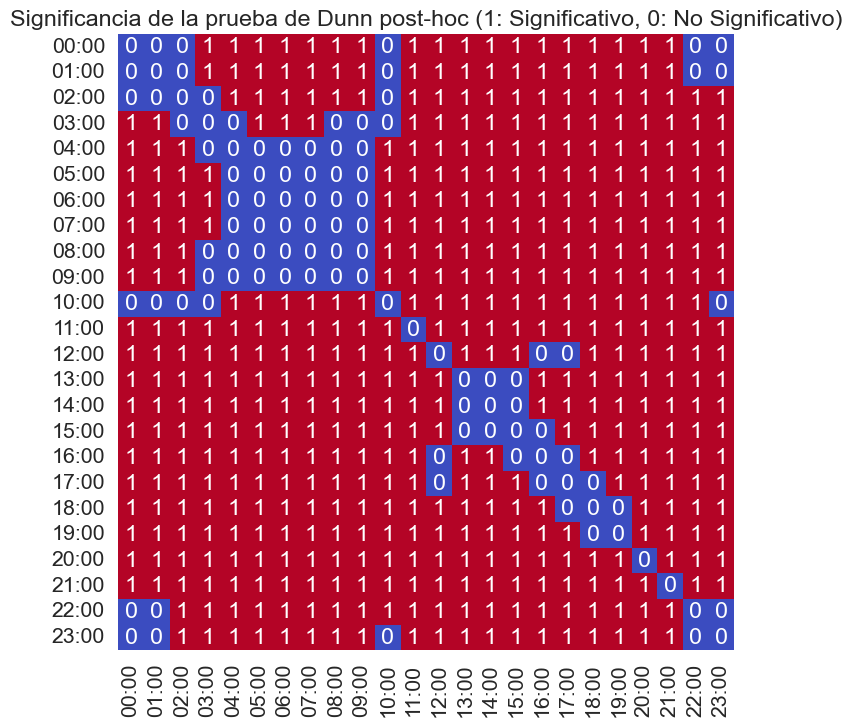

In [42]:
posthoc = sp.posthoc_dunn(data, val_col='Velocidad', group_col='HORA', p_adjust='bonferroni')  
sig_matrix = (posthoc < 0.05).astype(int)
    
# Visualizar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sig_matrix, annot=True, cmap='coolwarm', cbar=False, square=True, fmt="d")
plt.title("Significancia de la prueba de Dunn post-hoc (1: Significativo, 0: No Significativo)")
plt.show()


La mayoria de las horas tienen una velocidad del viento distinta entre si, se podria hacer una serie de tiempo y ver estacionalidad o cualquier otro analisis.

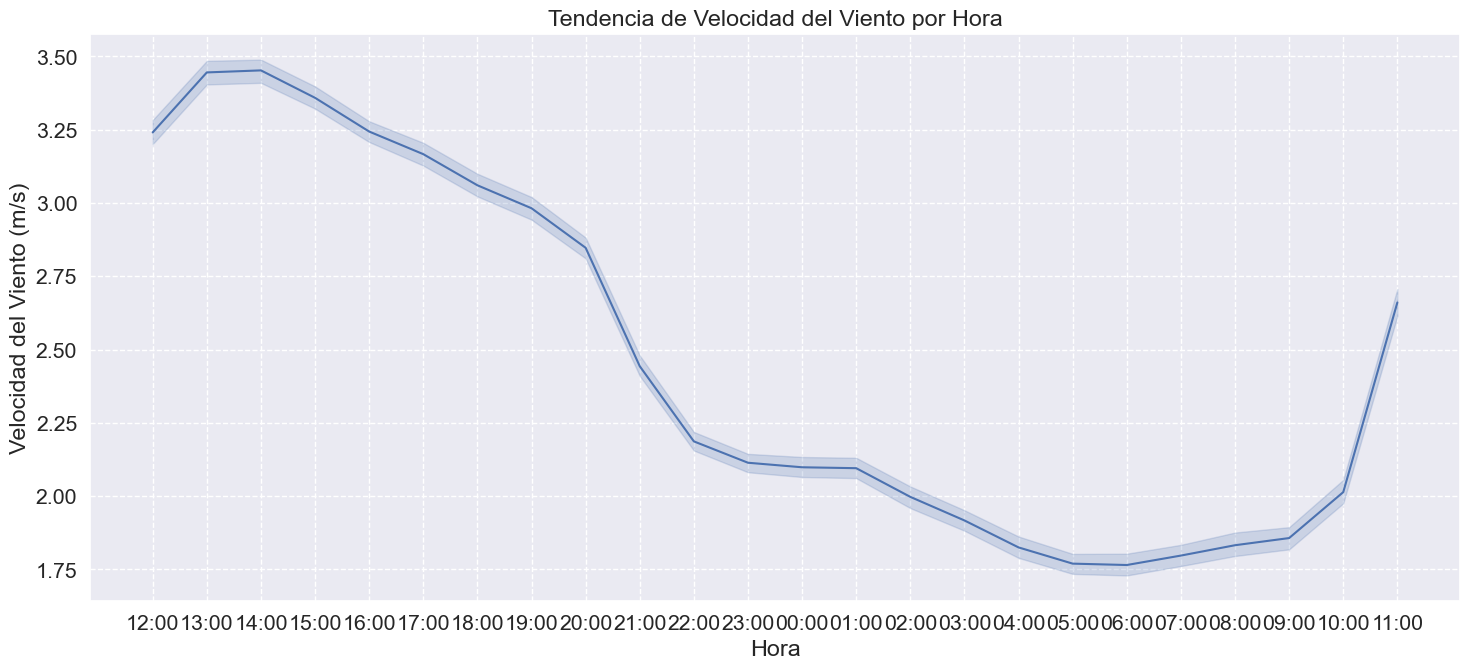

In [43]:
plt.figure(figsize=(15, 7))
sns.lineplot(x=data['HORA'], y=data['Velocidad'])

plt.title('Tendencia de Velocidad del Viento por Hora')
plt.xlabel('Hora')
plt.ylabel('Velocidad del Viento (m/s)')
plt.grid(True, which="both", ls="--")
plt.tight_layout()

plt.show()

Parece que a la 1 de la tarde alcanza su punto maximo, despues de eso baja hasta las 6 de la mañana y vuelve a subir hasta la 1.

# Analisis de correlacion

## Convertir variable categorica con OneHotEncoder

In [44]:
from sklearn.preprocessing import OneHotEncoder

# Asumiendo que tu DataFrame se llama 'data'
encoder = OneHotEncoder(sparse=False, drop='first') # 'drop' para evitar la multicolinealidad
hora_encoded = encoder.fit_transform(data[['HORA']])

# Convertir a DataFrame y obtener nombres de columnas
hora_df = pd.DataFrame(hora_encoded, columns=encoder.get_feature_names_out(['HORA']))

# Unir el DataFrame codificado al original
data_encoded = pd.concat([data, hora_df], axis=1)

# Eliminar la columna original de 'HORA' si lo deseas
data_encoded.drop('HORA', axis=1, inplace=True)

data_encoded.head()

,Direccion,Velocidad,Humedad MX,Humedad MN,Temp MX,Temp MN,Humedad relativa,Presion atmosferica,Precipitacion,MX vel,...,HORA_14:00,HORA_15:00,HORA_16:00,HORA_17:00,HORA_18:00,HORA_19:00,HORA_20:00,HORA_21:00,HORA_22:00,HORA_23:00
0,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
correlations = data_encoded.corr()
print(correlations['Velocidad'].sort_values(ascending=False))

Velocidad              1.000000
MX vel                 0.868279
Direccion              0.256588
Temp MX                0.247706
Presion MX             0.242446
Presion MN             0.231584
Temp MN                0.231472
Presion atmosferica    0.204031
HORA_14:00             0.156395
HORA_13:00             0.155210
HORA_15:00             0.141838
HORA_16:00             0.123663
HORA_12:00             0.122733
HORA_17:00             0.111382
HORA_18:00             0.094566
HORA_19:00             0.082026
HORA_20:00             0.060729
HORA_11:00             0.030738
Precipitacion          0.009466
HORA_21:00            -0.003634
HORA_22:00            -0.044420
HORA_23:00            -0.055988
HORA_01:00            -0.059093
HORA_10:00            -0.071380
HORA_02:00            -0.074690
HORA_03:00            -0.087357
HORA_09:00            -0.096005
HORA_08:00            -0.100229
HORA_04:00            -0.101821
HORA_07:00            -0.105923
HORA_05:00            -0.110529
HORA_06:

Observamos que hay varias variables altamente correlaciondas con la velocidad del tiempo, de especial interes la hora 6pm,

## Multicolinealidad

<module 'matplotlib.pyplot' from 'c:\\Miniconda\\miniconda3\\envs\\ml_venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

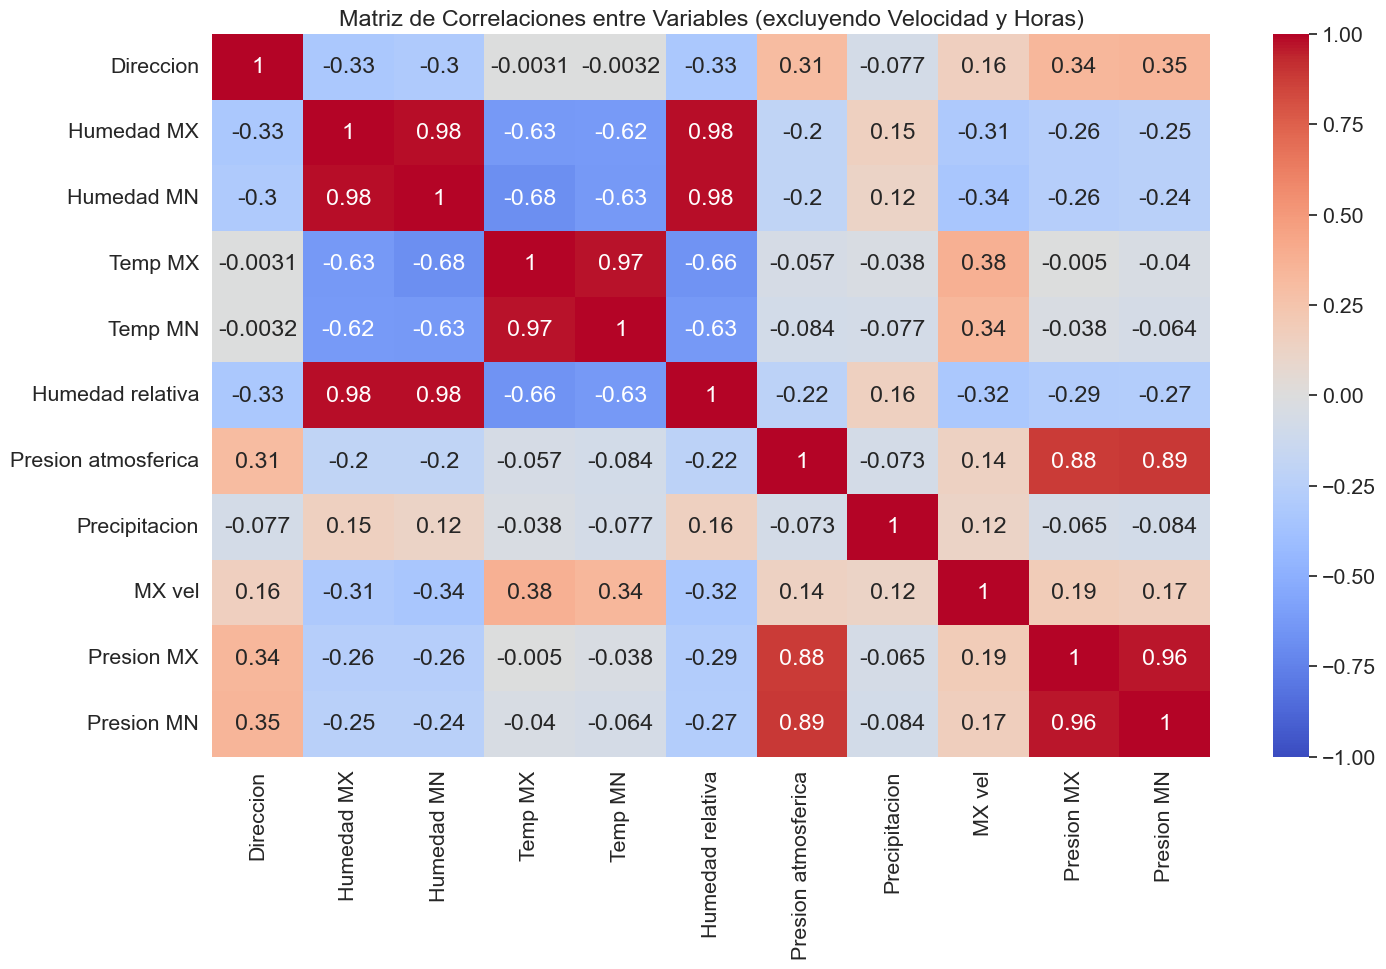

In [61]:

# Excluimos 'Velocidad' y las columnas de horas codificadas
velocity = data_encoded[['Velocidad']]
exclude_cols = ['Velocidad'] + [col for col in data_encoded.columns if 'HORA_' in col]
subset_data = data_encoded.drop(columns=exclude_cols)

correlations_subset = subset_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlations_subset, vmin=-1, vmax=1, annot=True, cmap='coolwarm', cbar=True)

plt.title("Matriz de Correlaciones entre Variables (excluyendo Velocidad y Horas)")
plt.tight_layout()
plt



Hacemos un heatmap con las correlaciones entre variables independientes con el fin de buscar multicolinealidad, a mayor valor absoluto mayor multicolinealidad.

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Esta funcion calcula los valores VIF para cada varibale de un data frame.

In [49]:
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

Esta funcion entra en un bucle para eliminar los valores de VIF mayores a 5, este VIF se vuelve a calcular despues de borrar cada varibale.

In [65]:
max_vif = 10  # inicializamos con un valor > 5 para que entre en el bucle

while max_vif > 5:
    vif_df = calculate_vif(subset_data)
    max_vif = vif_df["VIF"].max()
    if max_vif > 5:
        remove = vif_df.sort_values("VIF", ascending=False).iloc[0]
        subset_data = subset_data.drop(columns=remove["Variable"])
        print(f"Eliminando {remove['Variable']} con VIF = {remove['VIF']}")
        
print("\nVariables restantes:")
print(subset_data.columns)

Eliminando Presion MN con VIF = 965371.7239906547
Eliminando Presion MX con VIF = 222364.72987633428
Eliminando Temp MX con VIF = 2402.391831924075
Eliminando Humedad relativa con VIF = 589.1890466437395
Eliminando Humedad MX con VIF = 310.1109960465707
Eliminando Presion atmosferica con VIF = 131.95561756866454
Eliminando Temp MN con VIF = 12.640946487654038

Variables restantes:
Index(['Direccion', 'Humedad MN', 'Precipitacion', 'MX vel'], dtype='object')


In [67]:
# Recuperar el DataFrame original excluyendo las columnas eliminadas
data_model = data_encoded.drop(columns=[col for col in data_encoded.columns if col not in subset_data.columns and col != 'Velocidad'])
data_model = pd.concat([data_model, hora_df, velocity], axis=1)

print(data_model.head())



   Direccion  Velocidad  Humedad MN  Precipitacion  MX vel  HORA_01:00  \
0   0.809017        1.8        60.0            0.0     3.8         0.0   
1   0.965926        2.7        55.0            0.0     4.7         0.0   
2   0.891007        2.0        50.0            0.0     4.9         0.0   
3   0.848048        2.5        44.0            0.0     5.8         0.0   
4   0.224951        2.4        43.0            0.0     5.8         0.0   

   HORA_02:00  HORA_03:00  HORA_04:00  HORA_05:00  ...  HORA_15:00  \
0         0.0         0.0         0.0         0.0  ...         0.0   
1         0.0         0.0         0.0         0.0  ...         0.0   
2         0.0         0.0         0.0         0.0  ...         0.0   
3         0.0         0.0         0.0         0.0  ...         1.0   
4         0.0         0.0         0.0         0.0  ...         0.0   

   HORA_16:00  HORA_17:00  HORA_18:00  HORA_19:00  HORA_20:00  HORA_21:00  \
0         0.0         0.0         0.0         0.0        

Nos quedo repetida la columna de velocidad

In [95]:
data_model = data_model.T.drop_duplicates().T


In [96]:
data_model.head()

,Direccion,Velocidad,Humedad MN,Precipitacion,MX vel,HORA_01:00,HORA_02:00,HORA_03:00,HORA_04:00,HORA_05:00,...,HORA_14:00,HORA_15:00,HORA_16:00,HORA_17:00,HORA_18:00,HORA_19:00,HORA_20:00,HORA_21:00,HORA_22:00,HORA_23:00
0,0.809017,1.8,60.0,0.0,3.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.965926,2.7,55.0,0.0,4.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.891007,2.0,50.0,0.0,4.9,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.848048,2.5,44.0,0.0,5.8,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.224951,2.4,43.0,0.0,5.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelos de clasificacion

La metodología empleada al construir el código de los modelos sigue un esquema de validación basado en "pliegues" (o bloques) de tiempo. Usaremos 5 pliegues para cada modelo.

In [110]:
num_blocks = 5

## KNN

Los comentarios estan dentro del codigo.

In [97]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Separación de los datos de prueba y validación
test = data_model[-24:]
validation = data_model[-48:-24]
data = data_model[:-48]

# Se separó el conjunto de datos en tres segmentos: entrenamiento, validación y prueba. Los últimos 24 datos 
# fueron reservados para pruebas y los 24 anteriores a esos para validación. El resto se utilizó para el entrenamiento.
results = []

k_values = [1, 3, 5, 10] 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Velocidad', axis=1))
data['Features'] = list(data_scaled)

validation_scaled = scaler.transform(validation.drop('Velocidad', axis=1))
validation['Features'] = list(validation_scaled)

test_scaled = scaler.transform(test.drop('Velocidad', axis=1))
test['Features'] = list(test_scaled)

# La idea principal aquí es entrenar el modelo utilizando una ventana de tiempo que crece en tamaño con cada iteración. 
# Por ejemplo, en la primera iteración, usamos solo 24 datos (un día) para entrenar,  en la segunda iteración, 48, y así sucesivamente. 
# Este esquema permite emular una situación real donde se dispone de más datos históricos a medida que pasa el tiempo.
for block in range(1, num_blocks + 1):
    start = -24 * block
    train = data[start:]

    X_train = np.array(train['Features'].tolist())
    y_train = train['Velocidad']
    X_val = np.array(validation['Features'].tolist())
    y_val = validation['Velocidad']

    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_val)

        rmse = np.sqrt(mean_squared_error(y_val, predictions))
        mape = np.mean(np.abs((y_val - predictions) / y_val)) * 100
        r2 = r2_score(y_val, predictions)
#Para cada tamaño de ventana (o pliegue), se entrenó el modelo con los datos de entrenamiento 
# correspondientes y se validó utilizando el conjunto de validación reservado previamente.
        results.append({
            'Block': block,
            'K': k,
            'RMSE': rmse,
            'MAPE': mape,
            'R2': r2
        })

results_df = pd.DataFrame(results)

# Después de recopilar las métricas de error para cada combinación de parámetros y pliegue, 
# se calculó el error promedio para cada configuración de parámetros.
#Se eligió la configuración de parámetros que dio el menor error promedio en el conjunto de validación.
average_results = results_df.groupby('K').mean().reset_index()
best_k = int(average_results.loc[average_results['RMSE'].idxmin()]['K'])
print(f"El mejor valor de K basado en RMSE promedio es: {best_k}")

# Con los mejores parámetros identificados, se combinaron los 
# datos de entrenamiento y validación, y se entrenó el modelo final.
#Se evaluó el modelo en el conjunto de prueba para obtener las métricas de error finales, 
# que dan una estimación de cómo se desempeñaría el modelo en datos futuros no vistos.

knn_best = KNeighborsRegressor(n_neighbors=best_k)
X_train_all = np.array(data['Features'].tolist())
y_train_all = data['Velocidad']
X_final_train = np.vstack([X_train_all, X_val])
y_final_train = pd.concat([y_train_all, y_val])
X_test = np.array(test['Features'].tolist())
y_test = test['Velocidad']

knn_best.fit(X_final_train, y_final_train)
predictions_test = knn_best.predict(X_test)

rmse_test_knn = np.sqrt(mean_squared_error(y_test, predictions_test))
mape_test_knn = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100
r2_test_knn = r2_score(y_test, predictions_test)

print(results_df)

print(f"Resultados en el conjunto de prueba con KNN (K={best_k}):")
print(f"RMSE: {rmse_test_knn}")
print(f"MAPE: {mape_test_knn}")
print(f"R2: {r2_test_knn}")


El mejor valor de K basado en RMSE promedio es: 3
    Block   K      RMSE       MAPE        R2
0       1   1  0.944943  25.091217 -0.158483
1       1   3  0.699504  19.333068  0.365168
2       1   5  0.534727  15.000726  0.629026
3       1  10  0.546153  17.497561  0.613003
4       2   1  0.660492  20.114762  0.434003
5       2   3  0.647109  19.607019  0.456708
6       2   5  0.734416  21.100199  0.300218
7       2  10  0.590699  16.228729  0.547300
8       3   1  0.658597  20.572637  0.437247
9       3   3  0.621378  19.229620  0.499054
10      3   5  0.800354  22.583196  0.168920
11      3  10  0.706559  19.850384  0.352298
12      4   1  0.658597  20.572637  0.437247
13      4   3  0.564948  17.523148  0.585909
14      4   5  0.708225  21.910501  0.349239
15      4  10  0.948598  27.374003 -0.167462
16      5   1  0.658281  20.348953  0.437787
17      5   3  0.561084  17.368634  0.591555
18      5   5  0.674562  21.207612  0.409633
19      5  10  0.987358  28.161685 -0.264817
Resul

## Lasso

In [121]:
from sklearn.linear_model import Lasso

# Separación de los datos de prueba y validación
test = data_model[-24:]
validation = data_model[-48:-24]
data = data_model[:-48]

# Scaling de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Velocidad', axis=1))
X_test_scaled = scaler.transform(test.drop('Velocidad', axis=1))
X_val_scaled = scaler.transform(validation.drop('Velocidad', axis=1))

results = []

# Lista de alphas que deseas evaluar para la regresión Lasso
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

for block in range(1, num_blocks + 1):
    start = -24 * block
    X_train = scaled_data[start:]
    y_train = data['Velocidad'].values[start:]
    
    for alpha in alphas:
        lasso = Lasso(alpha=alpha, random_state=9)
        lasso.fit(X_train, y_train)
        predictions = lasso.predict(X_val_scaled)

        rmse = np.sqrt(mean_squared_error(validation['Velocidad'], predictions))
        mape = np.mean(np.abs((validation['Velocidad'] - predictions) / validation['Velocidad'])) * 100
        r2 = r2_score(validation['Velocidad'], predictions)

        results.append({
            'Block': block,
            'Alpha': alpha,
            'RMSE': rmse,
            'MAPE': mape,
            'R2': r2
        })

results_df = pd.DataFrame(results)

# Obtener el mejor alpha basado en RMSE promedio
best_alpha = results_df.groupby('Alpha')['RMSE'].mean().idxmin()
print(f"El mejor alpha para Lasso basado en RMSE promedio es: {best_alpha}")

# Prueba final con el mejor alpha
lasso_best = Lasso(alpha=best_alpha, random_state=9)
X_train_all = scaled_data
y_train_all = data['Velocidad'].values
X_final_train = np.vstack([X_train_all, X_val_scaled])
y_final_train = np.concatenate([y_train_all, validation['Velocidad'].values])

lasso_best.fit(X_final_train, y_final_train)
predictions_test = lasso_best.predict(X_test_scaled)

rmse_test_lasso = np.sqrt(mean_squared_error(test['Velocidad'], predictions_test))
mape_test_lasso = np.mean(np.abs((test['Velocidad'] - predictions_test) / test['Velocidad'])) * 100
r2_test_lasso = r2_score(test['Velocidad'], predictions_test)

print(results_df)

print(f"Resultados en el conjunto de prueba con Lasso (Alpha={best_alpha}):")
print(f"RMSE: {rmse_test_lasso}")
print(f"MAPE: {mape_test_lasso}")
print(f"R2: {r2_test_lasso}")


El mejor alpha para Lasso basado en RMSE promedio es: 0.1
    Block     Alpha      RMSE       MAPE        R2
0       1    0.0001  0.793492  24.128095  0.183109
1       1    0.0010  0.654389  19.461822  0.444415
2       1    0.0100  0.628373  18.153829  0.487713
3       1    0.1000  0.555424  14.871671  0.599753
4       1    1.0000  0.823594  30.837632  0.119954
5       1   10.0000  0.970010  36.533367 -0.220763
6       1  100.0000  0.970010  36.533367 -0.220763
7       2    0.0001  0.680189  19.799281  0.399742
8       2    0.0010  0.673512  19.604035  0.411470
9       2    0.0100  0.613297  17.763385  0.512000
10      2    0.1000  0.462367  14.890369  0.722635
11      2    1.0000  0.790690  27.085896  0.188870
12      2   10.0000  0.886494  30.645482 -0.019602
13      2  100.0000  0.886494  30.645482 -0.019602
14      3    0.0001  0.528890  17.502523  0.637081
15      3    0.0010  0.525000  17.283437  0.642400
16      3    0.0100  0.499105  16.197889  0.676807
17      3    0.1000  0.4

## Ridge

In [122]:
from sklearn.linear_model import Ridge

# Separación de los datos de prueba y validación
test = data_model[-24:]
validation = data_model[-48:-24]
data = data_model[:-48]

# Scaling de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Velocidad', axis=1))
X_test_scaled = scaler.transform(test.drop('Velocidad', axis=1))
X_val_scaled = scaler.transform(validation.drop('Velocidad', axis=1))

results = []

# Lista de alphas que deseas evaluar para la regresión Ridge
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

for block in range(1, num_blocks + 1):
    start = -24 * block
    X_train = scaled_data[start:]
    y_train = data['Velocidad'].values[start:]
    
    for alpha in alphas:
        ridge = Ridge(alpha=alpha, random_state=9)
        ridge.fit(X_train, y_train)
        predictions = ridge.predict(X_val_scaled)

        rmse = np.sqrt(mean_squared_error(validation['Velocidad'], predictions))
        mape = np.mean(np.abs((validation['Velocidad'] - predictions) / validation['Velocidad'])) * 100
        r2 = r2_score(validation['Velocidad'], predictions)

        results.append({
            'Block': block,
            'Alpha': alpha,
            'RMSE': rmse,
            'MAPE': mape,
            'R2': r2
        })

results_df = pd.DataFrame(results)

# Obtener el mejor alpha basado en RMSE promedio
best_alpha = results_df.groupby('Alpha')['RMSE'].mean().idxmin()
print(f"El mejor alpha para Ridge basado en RMSE promedio es: {best_alpha}")

# Prueba final con el mejor alpha
ridge_best = Ridge(alpha=best_alpha, random_state=9)
X_train_all = scaled_data
y_train_all = data['Velocidad'].values
X_final_train = np.vstack([X_train_all, X_val_scaled])
y_final_train = np.concatenate([y_train_all, validation['Velocidad'].values])

ridge_best.fit(X_final_train, y_final_train)
predictions_test = ridge_best.predict(X_test_scaled)

rmse_test_ridge = np.sqrt(mean_squared_error(test['Velocidad'], predictions_test))
mape_test_ridge = np.mean(np.abs((test['Velocidad'] - predictions_test) / test['Velocidad'])) * 100
r2_test_ridge = r2_score(test['Velocidad'], predictions_test)

print(results_df)

print(f"Resultados en el conjunto de prueba con Ridge (Alpha={best_alpha}):")
print(f"RMSE: {rmse_test_ridge}")
print(f"MAPE: {mape_test_ridge}")
print(f"R2: {r2_test_ridge}")



El mejor alpha para Ridge basado en RMSE promedio es: 10.0
    Block     Alpha      RMSE       MAPE        R2
0       1    0.0001  0.653477  19.243988  0.445963
1       1    0.0010  0.653467  19.242519  0.445979
2       1    0.0100  0.653369  19.227881  0.446146
3       1    0.1000  0.652479  19.086267  0.447653
4       1    1.0000  0.648336  18.019058  0.454645
5       1   10.0000  0.623792  18.053960  0.495155
6       1  100.0000  0.732052  26.934726  0.304716
7       2    0.0001  0.680943  19.820839  0.398410
8       2    0.0010  0.680896  19.819657  0.398495
9       2    0.0100  0.680422  19.807875  0.399331
10      2    0.1000  0.675836  19.695564  0.407401
11      2    1.0000  0.639477  18.729177  0.469448
12      2   10.0000  0.523592  16.063266  0.644316
13      2  100.0000  0.564972  19.071053  0.585874
14      3    0.0001  0.529339  17.526950  0.636465
15      3    0.0010  0.529330  17.526467  0.636477
16      3    0.0100  0.529239  17.521648  0.636602
17      3    0.1000  0.

## Decision tree

In [109]:
from sklearn.tree import DecisionTreeRegressor

test = data_model[-24:]
validation = data_model[-48:-24]
data = data_model[:-48]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Velocidad', axis=1))
X_test_scaled = scaler.transform(test.drop('Velocidad', axis=1))
X_val_scaled = scaler.transform(validation.drop('Velocidad', axis=1))

results = []

depths = [None, 5, 10, 15, 20]

for block in range(1, num_blocks + 1):
    start = -24 * block
    X_train = scaled_data[start:]
    y_train = data['Velocidad'].values[start:]
    
    for depth in depths:
        tree = DecisionTreeRegressor(max_depth=depth, random_state=9)
        tree.fit(X_train, y_train)
        predictions = tree.predict(X_val_scaled)

        rmse = np.sqrt(mean_squared_error(validation['Velocidad'], predictions))
        mape = np.mean(np.abs((validation['Velocidad'] - predictions) / validation['Velocidad'])) * 100
        r2 = r2_score(validation['Velocidad'], predictions)

        results.append({
            'Block': block,
            'Depth': depth,
            'RMSE': rmse,
            'MAPE': mape,
            'R2': r2
        })

results_df = pd.DataFrame(results)

average_results = results_df.groupby('Depth').mean().reset_index()
best_depth = int(average_results.loc[average_results['RMSE'].idxmin()]['Depth'])


print(f"La mejor profundidad basada en RMSE promedio es: {best_depth}")

tree_best = DecisionTreeRegressor(max_depth=best_depth, random_state=9)
X_train_all = scaled_data
y_train_all = data['Velocidad'].values
X_final_train = np.vstack([X_train_all, X_val_scaled])
y_final_train = np.concatenate([y_train_all, validation['Velocidad'].values])

tree_best.fit(X_final_train, y_final_train)
predictions_test = tree_best.predict(X_test_scaled)

rmse_test_tree = np.sqrt(mean_squared_error(test['Velocidad'], predictions_test))
mape_test_tree = np.mean(np.abs((test['Velocidad'] - predictions_test) / test['Velocidad'])) * 100
r2_test_tree = r2_score(test['Velocidad'], predictions_test)

print(results_df)

print(f"Resultados en el conjunto de prueba con Decision Tree (Depth={best_depth}):")
print(f"RMSE: {rmse_test_tree}")
print(f"MAPE: {mape_test_tree}")
print(f"R2: {r2_test_tree}")


La mejor profundidad basada en RMSE promedio es: 10
    Block  Depth      RMSE       MAPE        R2
0       1    NaN  0.586302  17.976295  0.554014
1       1    5.0  0.561826  16.972900  0.590474
2       1   10.0  0.586302  17.976295  0.554014
3       1   15.0  0.586302  17.976295  0.554014
4       1   20.0  0.586302  17.976295  0.554014
5       2    NaN  0.489898  14.916782  0.688621
6       2    5.0  0.570659  17.183217  0.577494
7       2   10.0  0.477079  14.779107  0.704703
8       2   15.0  0.489898  14.916782  0.688621
9       2   20.0  0.489898  14.916782  0.688621
10      3    NaN  0.590551  16.842425  0.547527
11      3    5.0  0.557536  16.367788  0.596703
12      3   10.0  0.599659  17.210855  0.533461
13      3   15.0  0.590551  16.842425  0.547527
14      3   20.0  0.590551  16.842425  0.547527
15      4    NaN  0.778353  21.906157  0.213983
16      4    5.0  0.768698  21.404451  0.233363
17      4   10.0  0.714883  19.075567  0.336947
18      4   15.0  0.778353  21.90615

## Random forest

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

test = data_model[-24:]
validation = data_model[-48:-24]
data = data_model[:-48]

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
test_scaled = pd.DataFrame(scaler.transform(test), columns=test.columns)
validation_scaled = pd.DataFrame(scaler.transform(validation), columns=validation.columns)

results = []

n_estimators_list = [10, 50, 100]
max_depths = [None, 5, 10, 15]

for block in range(1, num_blocks + 1):
    start = -24 * block
    train = data_scaled[start:]
    
    X_train = train.drop('Velocidad', axis=1)
    y_train = train['Velocidad']
    X_val = validation_scaled.drop('Velocidad', axis=1)
    y_val = validation_scaled['Velocidad']
    
    for n_estimators in n_estimators_list:
        for max_depth in max_depths:
            rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=9)
            rf.fit(X_train, y_train)
            predictions = rf.predict(X_val)

            rmse = np.sqrt(mean_squared_error(y_val, predictions))
            mape = np.mean(np.abs((y_val - predictions) / y_val)) * 100
            r2 = r2_score(y_val, predictions)

            results.append({
                'Block': block,
                'N_Estimators': n_estimators,
                'Max_Depth': max_depth,
                'RMSE': rmse,
                'MAPE': mape,
                'R2': r2
            })

results_df = pd.DataFrame(results)

average_results = results_df.groupby(['N_Estimators', 'Max_Depth']).mean().reset_index()
best_config = average_results.loc[average_results['RMSE'].idxmin()]
best_n_estimators = int(best_config['N_Estimators'])
best_max_depth = None if pd.isna(best_config['Max_Depth']) else int(best_config['Max_Depth'])

print(f"La mejor configuración basada en RMSE promedio es: N_Estimators={best_n_estimators}, Max_Depth={best_max_depth}")

rf_best = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=9)
X_train_all = pd.concat([data_scaled.drop('Velocidad', axis=1), X_val])
y_train_all = pd.concat([data_scaled['Velocidad'], y_val])
X_test = test_scaled.drop('Velocidad', axis=1)
y_test = test_scaled['Velocidad']

rf_best.fit(X_train_all, y_train_all)
predictions_test = rf_best.predict(X_test)

rmse_test_rf = np.sqrt(mean_squared_error(y_test, predictions_test))
mape_test_rf = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100
r2_test_rf = r2_score(y_test, predictions_test)

print(results_df)

print(f"Resultados en el conjunto de prueba con RandomForest (N_Estimators={best_n_estimators}, Max_Depth={best_max_depth}):")
print(f"RMSE: {rmse_test_rf}")
print(f"MAPE: {mape_test_rf}")
print(f"R2: {r2_test_rf}")


La mejor configuración basada en RMSE promedio es: N_Estimators=100, Max_Depth=15
    Block  N_Estimators  Max_Depth      RMSE        MAPE        R2
0       1            10        NaN  0.414664  103.414755  0.614960
1       1            10        5.0  0.413454  106.309003  0.617204
2       1            10       10.0  0.414664  103.414755  0.614960
3       1            10       15.0  0.414664  103.414755  0.614960
4       1            50        NaN  0.387470   96.221303  0.663806
5       1            50        5.0  0.392320   96.716652  0.655337
6       1            50       10.0  0.387470   96.221303  0.663806
7       1            50       15.0  0.387470   96.221303  0.663806
8       1           100        NaN  0.370793  104.876408  0.692124
9       1           100        5.0  0.374346  106.007843  0.686194
10      1           100       10.0  0.370793  104.876408  0.692124
11      1           100       15.0  0.370793  104.876408  0.692124
12      2            10        NaN  0.353665  1

## XGBoost

In [118]:
from sklearn.ensemble import GradientBoostingRegressor


test = data_model[-24:]
validation = data_model[-48:-24]
data = data_model[:-48]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Velocidad', axis=1))
X_test_scaled = scaler.transform(test.drop('Velocidad', axis=1))
X_val_scaled = scaler.transform(validation.drop('Velocidad', axis=1))

learning_rates = [0.01, 0.1]
depths = [3, 5]
results = []

for block in range(1, num_blocks + 1):
    start = -24 * block
    X_train = scaled_data[start:]
    y_train = data['Velocidad'].values[start:]
    
    for lr in learning_rates:
        for depth in depths:
            gbr = GradientBoostingRegressor(learning_rate=lr, max_depth=depth, random_state=9)
            gbr.fit(X_train, y_train)
            predictions = gbr.predict(X_val_scaled)

            rmse = np.sqrt(mean_squared_error(validation['Velocidad'], predictions))
            mape = np.mean(np.abs((validation['Velocidad'] - predictions) / validation['Velocidad'])) * 100
            r2 = r2_score(validation['Velocidad'], predictions)

            results.append({
                'Block': block,
                'Learning Rate': lr,
                'Depth': depth,
                'RMSE': rmse,
                'MAPE': mape,
                'R2': r2
            })

results_df = pd.DataFrame(results)

grouped = results_df.groupby(['Learning Rate', 'Depth']).mean().reset_index()
best_params = grouped.loc[grouped['RMSE'].idxmin()]
best_lr = best_params['Learning Rate']
best_depth = int(best_params['Depth'])

print(f"La mejor tasa de aprendizaje es: {best_lr} y la mejor profundidad es: {best_depth}")

gbr_best = GradientBoostingRegressor(learning_rate=best_lr, max_depth=best_depth, random_state=9)
X_train_all = scaled_data
y_train_all = data['Velocidad'].values
X_final_train = np.vstack([X_train_all, X_val_scaled])
y_final_train = np.concatenate([y_train_all, validation['Velocidad'].values])

gbr_best.fit(X_final_train, y_final_train)
predictions_test = gbr_best.predict(X_test_scaled)

rmse_test_xgb = np.sqrt(mean_squared_error(test['Velocidad'], predictions_test))
mape_test_xgb = np.mean(np.abs((test['Velocidad'] - predictions_test) / test['Velocidad'])) * 100
r2_test_xgb = r2_score(test['Velocidad'], predictions_test)

print(f"Resultados en el conjunto de prueba con Gradient Boosting (Learning Rate={best_lr}, Depth={best_depth}):")
print(f"RMSE: {rmse_test_xgb}")
print(f"MAPE: {mape_test_xgb}")
print(f"R2: {r2_test_xgb}")


La mejor tasa de aprendizaje es: 0.1 y la mejor profundidad es: 5
Resultados en el conjunto de prueba con Gradient Boosting (Learning Rate=0.1, Depth=5):
RMSE: 0.5941688690749797
MAPE: 13.7126092070036
R2: 0.8402498919749584


## Suport Vector Machine

In [111]:
from sklearn.svm import SVR

# Separación de los datos de prueba y validación
test = data_model[-24:]
validation = data_model[-48:-24]
data = data_model[:-48]

# Scaling de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Velocidad', axis=1))
X_test_scaled = scaler.transform(test.drop('Velocidad', axis=1))
X_val_scaled = scaler.transform(validation.drop('Velocidad', axis=1))

# Número de bloques de 24 horas para entrenamiento
results = []

# Lista de C (parámetro de regularización) y kernel que deseas evaluar
C_values = [0.1, 1, 10]
kernels = ['linear', 'rbf']

for block in range(1, num_blocks + 1):
    start = -24 * block
    X_train = scaled_data[start:]
    y_train = data['Velocidad'].values[start:]
    
    for C in C_values:
        for kernel in kernels:
            svm = SVR(C=C, kernel=kernel)
            svm.fit(X_train, y_train)
            predictions = svm.predict(X_val_scaled)

            rmse = np.sqrt(mean_squared_error(validation['Velocidad'], predictions))
            mape = np.mean(np.abs((validation['Velocidad'] - predictions) / validation['Velocidad'])) * 100
            r2 = r2_score(validation['Velocidad'], predictions)

            results.append({
                'Block': block,
                'C': C,
                'Kernel': kernel,
                'RMSE': rmse,
                'MAPE': mape,
                'R2': r2
            })

results_df = pd.DataFrame(results)

# Obtener los mejores parámetros basados en RMSE promedio
grouped = results_df.groupby(['C', 'Kernel']).mean().reset_index()
best_params = grouped.loc[grouped['RMSE'].idxmin()]
best_C = best_params['C']
best_kernel = best_params['Kernel']

print(f"El mejor valor de C es: {best_C} y el mejor kernel es: {best_kernel}")

# Prueba final con los mejores parámetros
svm_best = SVR(C=best_C, kernel=best_kernel)
X_train_all = scaled_data
y_train_all = data['Velocidad'].values
X_final_train = np.vstack([X_train_all, X_val_scaled])
y_final_train = np.concatenate([y_train_all, validation['Velocidad'].values])

svm_best.fit(X_final_train, y_final_train)
predictions_test = svm_best.predict(X_test_scaled)

rmse_test_svm = np.sqrt(mean_squared_error(test['Velocidad'], predictions_test))
mape_test_svm = np.mean(np.abs((test['Velocidad'] - predictions_test) / test['Velocidad'])) * 100
r2_test_svm = r2_score(test['Velocidad'], predictions_test)

print(results_df)

print(f"Resultados en el conjunto de prueba con SVM (C={best_C}, Kernel={best_kernel}):")
print(f"RMSE: {rmse_test_svm}")
print(f"MAPE: {mape_test_svm}")
print(f"R2: {r2_test_svm}")


El mejor valor de C es: 0.1 y el mejor kernel es: linear
    Block     C  Kernel      RMSE       MAPE        R2
0       1   0.1  linear  0.706764  19.023244  0.351921
1       1   0.1     rbf  0.858858  31.588644  0.042980
2       1   1.0  linear  0.622619  17.845540  0.497051
3       1   1.0     rbf  0.542818  17.844687  0.617715
4       1  10.0  linear  0.622619  17.845540  0.497051
5       1  10.0     rbf  0.724229  19.475204  0.319497
6       2   0.1  linear  0.444426  13.980576  0.743742
7       2   0.1     rbf  0.765073  25.468244  0.240576
8       2   1.0  linear  0.571438  16.644325  0.576341
9       2   1.0     rbf  0.501791  16.008120  0.673319
10      2  10.0  linear  0.662374  18.083175  0.430773
11      2  10.0     rbf  0.601063  18.251298  0.531275
12      3   0.1  linear  0.420435  13.822034  0.770662
13      3   0.1     rbf  0.720155  22.625351  0.327131
14      3   1.0  linear  0.494134  16.007861  0.683213
15      3   1.0     rbf  0.507765  15.399214  0.665494
16      

## Multilayer Perceptron

In [113]:
from sklearn.neural_network import MLPRegressor


test = data_model[-24:]
validation = data_model[-48:-24]
data = data_model[:-48]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Velocidad', axis=1))
X_test_scaled = scaler.transform(test.drop('Velocidad', axis=1))
X_val_scaled = scaler.transform(validation.drop('Velocidad', axis=1))

results = []

hidden_layer_sizes = [(10,), (20,), (30,), (10, 10), (20, 20)]
activations = ['relu', 'tanh']

for block in range(1, num_blocks + 1):
    start = -24 * block
    X_train = scaled_data[start:]
    y_train = data['Velocidad'].values[start:]
    
    for hidden_size in hidden_layer_sizes:
        for activation in activations:
            mlp = MLPRegressor(hidden_layer_sizes=hidden_size, activation=activation, random_state=9)
            mlp.fit(X_train, y_train)
            predictions = mlp.predict(X_val_scaled)

            rmse = np.sqrt(mean_squared_error(validation['Velocidad'], predictions))
            mape = np.mean(np.abs((validation['Velocidad'] - predictions) / validation['Velocidad'])) * 100
            r2 = r2_score(validation['Velocidad'], predictions)

            results.append({
                'Block': block,
                'Hidden Layer Size': str(hidden_size),
                'Activation': activation,
                'RMSE': rmse,
                'MAPE': mape,
                'R2': r2
            })

results_df = pd.DataFrame(results)

grouped = results_df.groupby(['Hidden Layer Size', 'Activation']).mean().reset_index()
best_params = grouped.loc[grouped['RMSE'].idxmin()]
best_hidden_str = best_params['Hidden Layer Size'].strip('()')
best_hidden_size = tuple(map(int, (s for s in best_hidden_str.split(',') if s)))
best_activation = best_params['Activation']

print(f"El mejor tamaño de capa oculta es: {best_hidden_size} y la mejor función de activación es: {best_activation}")

mlp_best = MLPRegressor(hidden_layer_sizes=best_hidden_size, activation=best_activation, random_state=9)
X_train_all = scaled_data
y_train_all = data['Velocidad'].values
X_final_train = np.vstack([X_train_all, X_val_scaled])
y_final_train = np.concatenate([y_train_all, validation['Velocidad'].values])

mlp_best.fit(X_final_train, y_final_train)
predictions_test = mlp_best.predict(X_test_scaled)

rmse_test_mlp = np.sqrt(mean_squared_error(test['Velocidad'], predictions_test))
mape_test_mlp = np.mean(np.abs((test['Velocidad'] - predictions_test) / test['Velocidad'])) * 100
r2_test_mlp = r2_score(test['Velocidad'], predictions_test)

print(results_df)

print(f"Resultados en el conjunto de prueba con MLP (Hidden Layer Size={best_hidden_size}, Activation={best_activation}):")
print(f"RMSE: {rmse_test_mlp}")
print(f"MAPE: {mape_test_mlp}")
print(f"R2: {r2_test_mlp}")


El mejor tamaño de capa oculta es: (20,) y la mejor función de activación es: relu
    Block Hidden Layer Size Activation      RMSE       MAPE        R2
0       1             (10,)       relu  1.231070  37.682796 -0.966275
1       1             (10,)       tanh  1.251034  32.818358 -1.030566
2       1             (20,)       relu  0.676713  21.219962  0.405862
3       1             (20,)       tanh  0.714901  22.487195  0.336913
4       1             (30,)       relu  0.902319  23.183446 -0.056327
5       1             (30,)       tanh  0.790858  23.340850  0.188525
6       1          (10, 10)       relu  0.676011  23.254588  0.407093
7       1          (10, 10)       tanh  0.676217  23.780888  0.406733
8       1          (20, 20)       relu  0.739727  21.719207  0.290061
9       1          (20, 20)       tanh  0.716115  20.104347  0.334658
10      2             (10,)       relu  1.228356  37.987169 -0.957614
11      2             (10,)       tanh  1.259377  34.184535 -1.057738
12     

# Evaluacion de metricas.

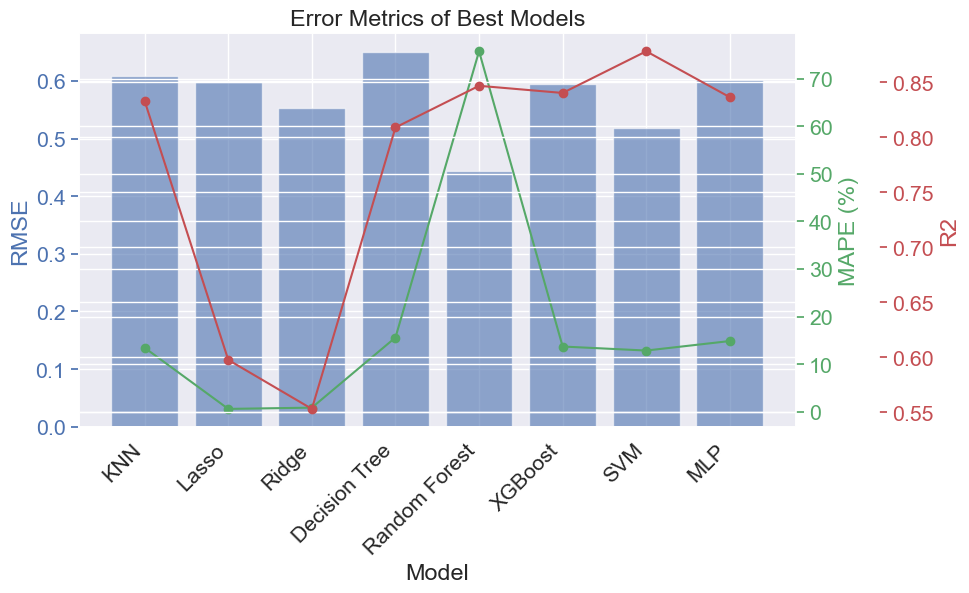

In [123]:
metrics = {
    'Model': ['KNN', 'Lasso', 'Ridge', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM', 'MLP'],
    'RMSE': [rmse_test_knn,rmse_test_lasso,rmse_test_ridge, rmse_test_tree, rmse_test_rf, rmse_test_xgb, rmse_test_svm, rmse_test_mlp],
    'MAPE': [mape_test_knn,rmse_test_lasso,r2_test_ridge, mape_test_tree, mape_test_rf, mape_test_xgb, mape_test_svm, mape_test_mlp],
    'R2': [r2_test_knn,rmse_test_lasso,rmse_test_ridge, r2_test_tree, r2_test_rf, r2_test_xgb, r2_test_svm, r2_test_mlp]
}

x = range(len(metrics['Model']))

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(x, metrics['RMSE'], color='b', alpha=0.6, label='RMSE')
ax1.set_xlabel('Model')
ax1.set_ylabel('RMSE', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics['Model'], rotation=45, ha="right")

ax2 = ax1.twinx()
ax2.plot(metrics['Model'], metrics['MAPE'], color='g', marker='o', label='MAPE')
ax2.set_ylabel('MAPE (%)', color='g')
ax2.tick_params('y', colors='g')

ax3 = ax1.twinx()
ax3.plot(metrics['Model'], metrics['R2'], color='r', marker='o', label='R2')
ax3.set_ylabel('R2', color='r')
ax3.tick_params('y', colors='r')
ax3.spines['right'].set_position(('outward', 60))

fig.tight_layout()
plt.title('Error Metrics of Best Models')
plt.show()


La tabla presenta las métricas de evaluación para los distintos modelos de aprendizaje automático que se han probado. Cada fila representa un modelo específico y sus respectivas métricas de rendimiento. La métrica RMSE (Root Mean Square Error) muestra la magnitud promedio de los errores entre los valores predichos y los valores reales. Cuanto más cercano a cero sea el RMSE, mejor es el rendimiento del modelo. La métrica MAPE (Mean Absolute Percentage Error) representa el error promedio en términos porcentuales, lo que puede ser útil para entender el error relativo. Al igual que con el RMSE, un MAPE más bajo indica un mejor rendimiento del modelo. Por último, el valor R^2 indica cuánta variabilidad en los datos puede ser explicada por el modelo. Un R^2 cercano a 1 indica que el modelo puede explicar una gran proporción de la variabilidad en los datos. Al revisar estas métricas en conjunto, se puede determinar qué modelo ofrece las predicciones más precisas y confiables para el conjunto de datos en cuestión.